<a href="https://colab.research.google.com/github/wal-03/Case-Study-2-Data-Mining/blob/main/Study_Case_DatMin_02_Kel_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Study Case Data Mining 02: CLUSTERING**

**Kelompok E**
*   Raynaldi Ilham Nanda Nur P. - 11210940000055
*   Ahmad Izza - 11220940000006  
*   Ulfatul Adawiyah - 11220940000011
*   Rihadatulaisy Nahsya Arawinda - 11220940000059
*   Fadhilah Awal Rizqiansyah - 11220940000064



# **Import dan Load Data**

In [ ]:
# Importing Some Python Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings; warnings.simplefilter('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

!pip install kmodes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle

from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.7 MB/s eta 0:00:00


In [ ]:
# Loading Data:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/wal-03/Data-MixlTup/main/Data-MixlTup.csv

--2024-10-18 12:24:29--  https://raw.githubusercontent.com/wal-03/Data-MixlTup/main/Data-MixlTup.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10440 (10K) [text/plain]
Saving to: ‘data/Data-MixlTup.csv’

Data-MixlTup.csv    100%[===================>]  10.20K  --.-KB/s    in 0.001s  

2024-10-18 12:24:30 (16.4 MB/s) - ‘data/Data-MixlTup.csv’ saved [10440/10440]



In [ ]:
df = pd.read_csv("data/Data-MixlTup.csv", low_memory = False, encoding='utf8')

In [ ]:
# Menampilkan data
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
196,297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7
198,299,Wanita,23,"Rp1,229,508",94,1,Depok,0.0,Selasa,0


# **Preprocessing**

## Menghapus Variabel

In [ ]:
df.columns

Index(['ID', 'Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan',
       'skor-pengeluaran', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor'],
      dtype='object')

In [ ]:
# Menghapus variabel yang tidak diperlukan
df.drop(columns=['ID'], inplace = True)

In [ ]:
df.columns

Index(['Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran',
       'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor'],
      dtype='object')

## Mengoreksi Tipe Variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         196 non-null    object 
 1   Umur                  200 non-null    object 
 2   Pendapatan-per-bulan  200 non-null    object 
 3   skor-pengeluaran      200 non-null    int64  
 4   Menikah               188 non-null    object 
 5   Kota                  200 non-null    object 
 6   Promo                 194 non-null    float64
 7   HariFav               200 non-null    object 
 8   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 14.2+ KB


In [ ]:
# Menghapus simbol mata uang 'Rp' dan tanda koma pada kolom 'Pendapatan-per-bulan'
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].replace({'Rp': '', ',': ''}, regex=True)

In [ ]:
# Menghapus tanda kutip (atau karakter lainnya yang tidak valid) dari kolom yang bermasalah
df['Umur'] = df['Umur'].replace({"'": ""}, regex=True)

In [ ]:
# Mengubah tipe data 'object' atau 'int64' menjadi 'category'
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Menikah'] = df['Menikah'].astype('category')
df['Kota'] = df['Kota'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
df['FavFlavor'] = df['FavFlavor'].astype('category')
df['Umur'] = df['Umur'].astype('int64')
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].astype('int64')

In [ ]:
# Melihat tipe data yang telah mengalami perubahan
df.dtypes

,0
Jenis Kelamin,category
Umur,int64
Pendapatan-per-bulan,int64
skor-pengeluaran,int64
Menikah,category
Kota,category
Promo,category
HariFav,category
FavFlavor,category


## Noise

### Variabel Numerik

In [ ]:
# Menggunakan statistika deskriptif untuk melihat noise
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Umur,200.0,3.735500e+01,1.199242e+01,2.0,28.75,36.0,48.0,60.0
Pendapatan-per-bulan,200.0,1.867213e+07,1.076423e+07,0.0,10860655.00,19057377.0,25819672.0,50000000.0
skor-pengeluaran,200.0,5.047000e+01,2.607101e+01,1.0,34.75,50.0,73.0,101.0


Berdasarkan output diatas, jika dilihat sekilas terdapat noise di variabel 'umur' dan 'skor-pengeluaran'.

*   Umur dengan nilai minimum 2, dan
*   skor-pengeluaran dengan nilai 101.



In [ ]:
# Melihat baris yang bernilai 2 pada variabel 'Umur'
df[df['Umur'] == 2]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
119,Pria,2,18032786,41,0,Jakarta,2.0,Senin,0


In [ ]:
# Menghapus baris yang bernilai 2 pada variabel 'Umur'
df = df[df['Umur'] != 2]

In [ ]:
df[df['Umur'] == 2]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Umur,199.0,3.753266e+01,1.175584e+01,18.0,29.0,36.0,48.0,60.0
Pendapatan-per-bulan,199.0,1.867534e+07,1.079128e+07,0.0,10655737.0,19262295.0,25819672.0,50000000.0
skor-pengeluaran,199.0,5.051759e+01,2.612805e+01,1.0,34.5,50.0,73.0,101.0


Berdasarkan output yang diperoleh, terlihat bahwa pada bagian variabel 'Umur' nilai 'min' sudah terganti menjadi 18.

### Variabel Kategorik (Jenis Kelamin)

In [ ]:
# Menghitung value pada variabel kategorik Jenis Kelamin untuk melihat noise
df['Jenis Kelamin'].value_counts()

,count
Jenis Kelamin,
Wanita,109
Pria,85
-,1


Jika dilihat, pada output terdapat noise berupa nilai '-' pada variabel 'Jenis Kelamin'.

In [ ]:
# Melihat baris yang bernilai - pada variabel 'Jenis Kelamin'
df[df['Jenis Kelamin'] == "-"]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
185,-,21,0,81,0,Depok,1.0,Jumat,0


In [ ]:
# Menghapus baris yang bernilai 2 pada variabel 'Umur'
df = df[df['Jenis Kelamin'] != "-"]

In [ ]:
df[df['Jenis Kelamin'] == "-"]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


In [ ]:
# Melihat kembali value/nilai pada variabel 'Jenis Kelamin' untuk melihat noise
df['Jenis Kelamin'].value_counts()

,count
Jenis Kelamin,
Wanita,109
Pria,85
-,0


### Variabel Kategorik (Menikah)

In [ ]:
# Menghitung value pada variabel kategorik Menikah untuk melihat noise
df['Menikah'].value_counts()

,count
Menikah,
1,160
0,24
,1
-,1


Selanjutnya dilihat dari output, terdapat beberapa noise pada variabel 'Menikah'.

In [ ]:
# Melihat baris yang bernilai - pada variabel 'Menikah'
df[df['Menikah'] == "-"]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
180,Pria,50,28688524,26,-,Tangerang,3.0,Minggu,4


In [ ]:
# Melihat baris yang bernilai   pada variabel 'Menikah'
df[df['Menikah'] == " "]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
151,Pria,30,34426229,97,,Depok,NaN,Sabtu,0


In [ ]:
# Menghapus baris yang bernilai - pada variabel 'Menikah'
# Menghapus baris yang bernilai   pada variabel 'Menikah'
df = df[df['Menikah'] != "-"]
df = df[df['Menikah'] != " "]

In [ ]:
df[df['Menikah'] == "-"]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


In [ ]:
df[df['Menikah'] == " "]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


In [ ]:
# Melihat kembali value/nilai pada variabel 'Menikah' untuk melihat noise
df['Menikah'].value_counts()

,count
Menikah,
1,160
0,24
,0
-,0


### Variabel Kategorik (Kota)

In [ ]:
# Menghitung value pada variabel kategorik Kota untuk melihat noise
df['Kota'].value_counts()

,count
Kota,
Jakarta,86
Depok,57
Tangerang,52
JJakarta,1


Dari output, dapat diketahui terdapat kesalahan penulisan 'JJakarta' yang seharusnya bertuliskan 'Jakarta'.

In [ ]:
# Ganti nilai 'JJakarta' dengan 'Jakarta'
df['Kota'] = df['Kota'].replace('JJakarta', 'Jakarta')

In [ ]:
# Menghitung value pada variabel kategorik Kota untuk melihat noise
df['Kota'].value_counts()

,count
Kota,
Jakarta,87
Depok,57
Tangerang,52


### Variabel Kategorik (Promo)

In [ ]:
# Menghitung value pada variabel kategorik Promo untuk melihat noise
df['Promo'].value_counts()

,count
Promo,
1.0,85
3.0,49
2.0,42
0.0,14
5.0,1


Berdasarkan hasil output, terdapat noise berupa nilai promo '5.0'. Sementara jika melihat dari data understanding, promo hanya memiliki 4 jenis

*   0 (tidak pernah),
*   1 (jarang),
*   2 (sedang), dan
*   3 (sering)



In [ ]:
# Melihat baris yang bernilai 5 pada variabel 'Promo'
df[df['Promo'] == 5]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
14,Wanita,58,2049180,15,1,Tangerang,5.0,Sabtu,8


In [ ]:
# Menghapus baris yang bernilai 5 pada variabel 'Promo'
df = df[df['Promo'] != 5]

In [ ]:
df[df['Promo'] == 5]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


### Variabel Kategorik (HariFav)

In [ ]:
# Menghitung value pada variabel kategorik HariFav untuk melihat noise
df['HariFav'].value_counts()

,count
HariFav,
Senin,65
Sabtu,52
Minggu,42
Selasa,21
Kamis,6
Rabu,5
Jumat,4


### Variabel Kategorik (FavFlavor)

In [ ]:
# Menghitung value pada variabel kategorik FavFlavor untuk melihat noise
df['FavFlavor'].value_counts()

,count
FavFlavor,
0,37
1,20
2,20
3,20
5,20
6,20
7,20
4,19
8,18


Berdasarkan hasil output, terdapat noise berupa nilai FavFlavor '9'. Sementara jika melihat dari data understanding, FavFlavor hanya memiliki 9 jenis rasa, yaitu

*   0 (Vanilla),
*   1 (Strawberry),
*   2 (Cokelat), dan
*   3 (Blueberry)
*   4 (BubbleGum/Cotton Candy),
*   5 (Coconut),
*   6 (Caramel Pecan),
*   7 (Mix 2 Flavors), dan
*   8 (Mix 3 Flavors)


In [ ]:
# Melihat baris yang bernilai 9 pada variabel 'FavFlavor'
df[df['FavFlavor'] == 9]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
130,Wanita,44,25819672,20,1,Tangerang,3.0,Sabtu,9


In [ ]:
# Menghapus baris yang bernilai 9 pada variabel 'FavFlavor'
df = df[df['FavFlavor'] != 9]

In [ ]:
df[df['FavFlavor'] == 9]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


## Menghapus Duplikasi Data

In [ ]:
print(df.shape)
df.duplicated().sum()

(194, 9)


0

Tidak terdapat duplikasi pada data

## Outlier

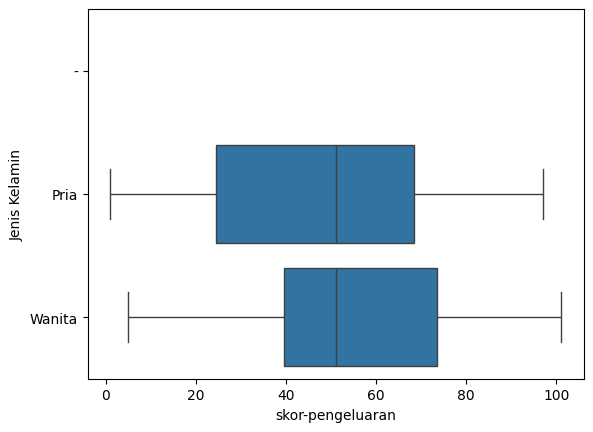

In [ ]:
# Menggunakan boxplot untuk melihat outlier pada variabel skor-pengeluaran
p = sns.boxplot(x="skor-pengeluaran", y="Jenis Kelamin", data=df)

Tidak terdapat outlier pada variabel skor-pengeluaran

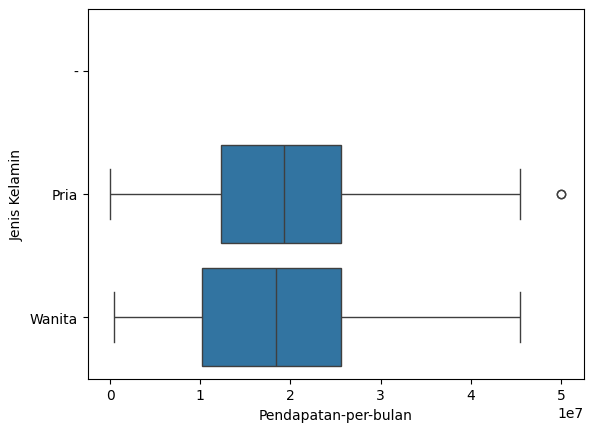

In [ ]:
# Menggunakan boxplot untuk melihat outlier pada variabel skor-pengeluaran
p = sns.boxplot(x="Pendapatan-per-bulan", y="Jenis Kelamin", data=df)

Terdapat satu outlier pada variabel Pendapatan-per-bulan, tetapi disini kami mempertahankannya.

## Missing Value

In [ ]:
print(df.isnull().sum())

Jenis Kelamin            4
Umur                     0
Pendapatan-per-bulan     0
skor-pengeluaran         0
Menikah                 12
Kota                     0
Promo                    5
HariFav                  0
FavFlavor                0
dtype: int64


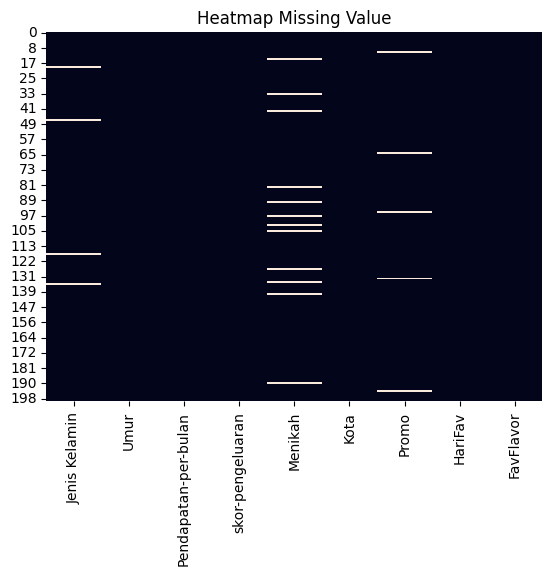

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

Dari output yang telah diperoleh, terdapat beberapa missing value pada variabel:

1.   Jenis kelamin
2.   Menikah
3.   Promo

Karena jumlah missing value pada ketiga variabel di atas tidak banyak, maka dapat diatasi dengan menghapus missing value tersebut.

In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df.isnull().sum())

Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64


In [ ]:
df['Menikah'].value_counts()

,count
Menikah,
1,149
0,24
,0
-,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Umur,173.0,3.717919e+01,1.202310e+01,18.0,27.0,36.0,47.0,60.0
Pendapatan-per-bulan,173.0,1.864636e+07,1.058813e+07,0.0,11065573.0,18852459.0,25409836.0,50000000.0
skor-pengeluaran,173.0,5.088439e+01,2.596998e+01,1.0,35.0,51.0,73.0,99.0


Output diatas sudah bisa digunakan untuk tahap analisis selanjutnya.

# **Eksplorasi Data**

## Ekplorasi Data Numerik

In [ ]:
numerik = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

<Figure size 640x480 with 0 Axes>

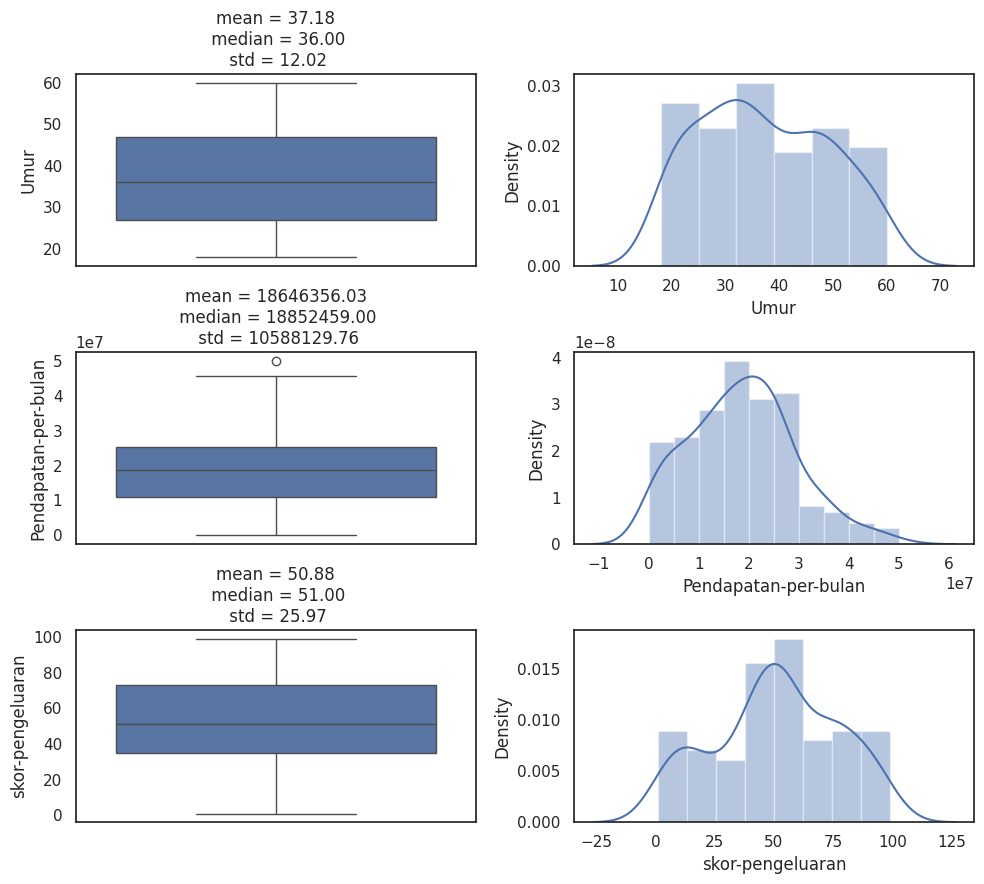

In [ ]:
sns.set(style='white')
plt.clf()

# Fungsi untuk membuat plot
def plot_num(features):
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        p1=sns.boxplot(df[kol], ax = axs[i][0])
        p2=sns.distplot(df[kol], ax = axs[i][1])
        axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk membuat Plot untuk data numerik
plot_num(numerik)

Dari visualisasi data, dapat disimpulkan bahwa distribusi umur responden cenderung simetris dengan rata-rata usia 37,18 tahun, mayoritas berada dalam rentang 30-40 tahun. Pendapatan per bulan memiliki distribusi yang sedikit skewed ke kanan, menunjukkan sebagian besar individu berpendapatan lebih rendah dengan beberapa outlier yang berpenghasilan jauh lebih tinggi, dengan rata-rata pendapatan sekitar 18,4 juta rupiah. Sementara itu, distribusi skor pengeluaran menunjukkan pola bimodal, yang mungkin mencerminkan adanya perbedaan signifikan dalam kebiasaan pengeluaran di antara individu, meskipun secara keseluruhan rata-rata pengeluaran berada di sekitar 50,88. Kombinasi visual ini menunjukkan adanya keragaman dalam profil demografi dan ekonomi responden.

## Eksplorasi Data Kategorik

In [ ]:
kategorik = ['Jenis Kelamin','Menikah','Kota', 'Promo', 'HariFav', 'FavFlavor']

<Figure size 640x480 with 0 Axes>

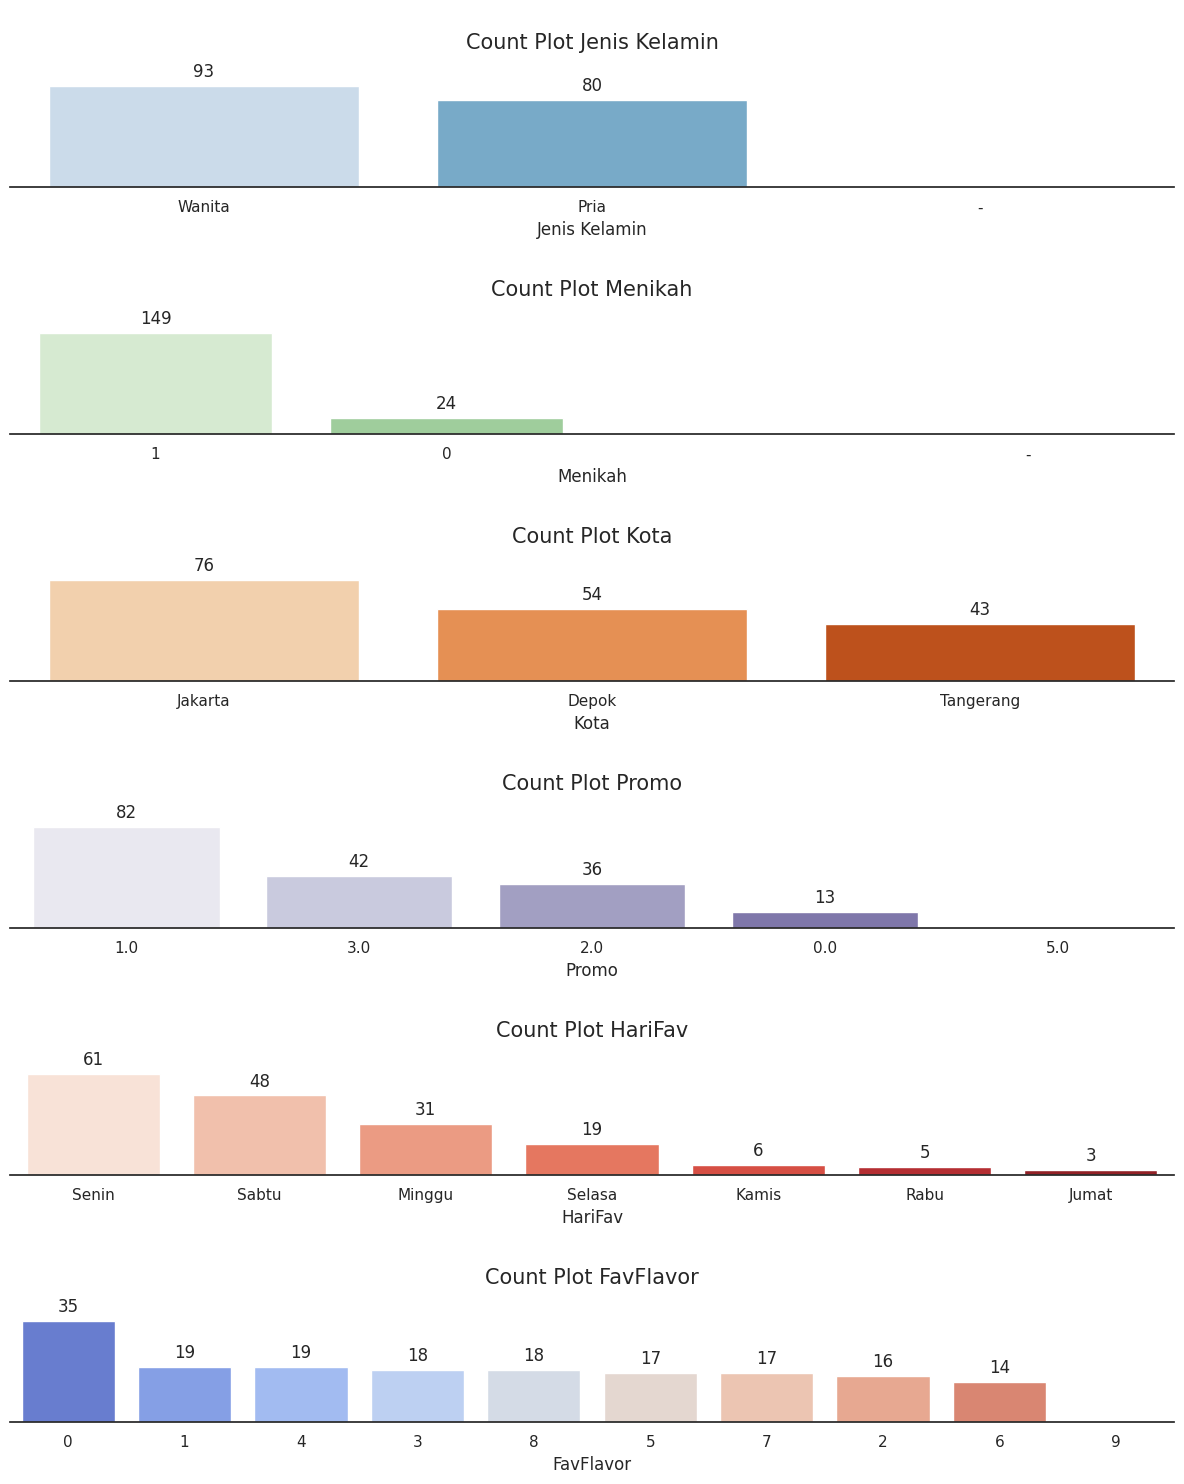

In [ ]:
# Menetapkan gaya seaborn
sns.set(style='white')
plt.clf()

# Daftar palet warna
palettes = ['Blues', 'Greens', 'Oranges', 'Purples', 'Reds', 'coolwarm']

# Membuat canvas
fig, axs = plt.subplots(6, 1, figsize=(12, 15))

# Membuat plot untuk setiap kolom kategorikal
for i, kol2 in enumerate(kategorik):
    # Membuat Plot dengan warna berbeda
    sns.countplot(x=df[kol2], order=df[kol2].value_counts().index, ax=axs[i], palette=palettes[i])
    axs[i].set_title('\nCount Plot %s\n' % (kol2), fontsize=15)

    # Memberikan anotasi
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10),
                        textcoords='offset points')

    # Setting Plot
    sns.despine(right=True, top=True, left=True)
    axs[i].axes.yaxis.set_visible(False)

plt.tight_layout()

# Tampilkan plot
plt.show()

Dari hasil analisis distribusi variabel kategorikal, dapat disimpulkan bahwa mayoritas responden adalah wanita (93 orang) dibandingkan pria (80 orang), dan sebagian besar dari mereka belum menikah (149 orang), dengan hanya 24 responden yang sudah menikah. Distribusi responden berdasarkan kota menunjukkan bahwa Jakarta memiliki jumlah terbanyak (76 orang), diikuti oleh Depok (54 orang) dan Tangerang (43 orang). Dalam hal penggunaan promo, promo "1.0" paling sering digunakan (82 kali), sedangkan promo "5.0" tidak digunakan sama sekali. Temuan ini memberikan wawasan penting bagi tim marketing MixITup untuk memahami demografi dan preferensi pelanggan, terutama dalam pengoptimalan promosi dan strategi pemasaran di kota-kota tertentu.

# **Persiapan Data Model**

## **Standarisasi Kolom Numerik**

In [ ]:
# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[numerik ].describe().round(1))

# Standarisasi
df_std = StandardScaler().fit_transform(df[numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[numerik].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(df_std.describe().round(0))

Statistik sebelum Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  173.0                 173.0             173.0
mean    37.2            18646356.0              50.9
std     12.0            10588129.8              26.0
min     18.0                   0.0               1.0
25%     27.0            11065573.0              35.0
50%     36.0            18852459.0              51.0
75%     47.0            25409836.0              73.0
max     60.0            50000000.0              99.0

Hasil Standarisasi

       Umur  Pendapatan-per-bulan  skor-pengeluaran
0  0.986029             -0.523951          0.043082
1 -0.432020              1.417023          1.356086
2  1.152858             -0.252214         -0.381713
3 -1.516411             -0.562770          0.158936
4  0.068468              0.135980         -0.343095

Statistik Hasil Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  173.0                 173.0             173.0
mean     0.0         

Proses standarisasi pada data numerik ini menghasilkan nilai variabel yang memiliki rata-rata 0 dan standar deviasi 1, sehingga perbedaan skala antar-variabel seperti **Umur**, **Pendapatan per bulan**, dan **Skor Pengeluaran** dapat disejajarkan. Sebelum standarisasi, masing-masing variabel memiliki rentang yang berbeda-beda, dengan pendapatan per bulan memiliki variasi yang jauh lebih besar dibandingkan variabel lain. Setelah standarisasi, semua variabel berada dalam skala yang sama, yang penting untuk memastikan bahwa tidak ada variabel yang mendominasi dalam analisis statistik atau algoritma pembelajaran mesin yang akan digunakan. Hasil ini mempersiapkan data untuk analisis yang lebih akurat dan setara, terutama dalam konteks metode yang sensitif terhadap skala variabel.

## **Konversi Kategorik Data dengan Label Encoder**

In [ ]:
# Membuat salinan data frame
df_encode = df[kategorik].copy()

# Melakukan labelEncoder untuk semua kolom kategorik
for col in kategorik:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor
0              1        1     1      1        4          2
1              1        1     0      1        2          6
2              0        1     1      2        2          3
3              0        0     1      1        3          7
4              1        1     1      2        6          8


Label encoding ini berguna untuk mengubah data kategorikal menjadi data numerik, yang kemudian dapat digunakan dalam algoritma machine learning yang memerlukan input numerik. Hasilnya adalah data yang dapat diproses secara efisien tanpa menghilangkan informasi dari kategori asli.

## **Menggabungkan data frame**

In [ ]:
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_model.head())

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor      Umur  \
0              1        1     1      1        4          2  0.986029   
1              1        1     0      1        2          6 -0.432020   
2              0        1     1      2        2          3  1.152858   
3              0        0     1      1        3          7 -1.516411   
4              1        1     1      2        6          8  0.068468   

   Pendapatan-per-bulan  skor-pengeluaran  
0             -0.523951          0.043082  
1              1.417023          1.356086  
2             -0.252214         -0.381713  
3             -0.562770          0.158936  
4              0.135980         -0.343095  


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         173 non-null    int64  
 1   Menikah               173 non-null    int64  
 2   Kota                  173 non-null    int64  
 3   Promo                 173 non-null    int64  
 4   HariFav               173 non-null    int64  
 5   FavFlavor             173 non-null    int64  
 6   Umur                  173 non-null    float64
 7   Pendapatan-per-bulan  173 non-null    float64
 8   skor-pengeluaran      173 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 17.6 KB


# **Clustering**

**Disini kami menggunakan 2 metode clustering. Yaitu K-Medoids dan K-Means++.**

## **K-Medoids**

### Pilih k yang Optimal (Elbow Method)

Shape of X: (173, 9)
     Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor      Umur  \
146              0        0     1      1        6          5 -1.516411   
100              1        1     1      1        3          1  0.485541   
192              1        1     0      1        6          4 -0.515435   
99               1        1     1      2        0          5 -0.682264   
20               0        0     0      1        6          6 -1.266167   

     Pendapatan-per-bulan  skor-pengeluaran  
146             -0.485131          0.313407  
100             -0.485131         -0.034153  
192              0.368897          1.008526  
99              -0.795687         -0.343095  
20              -1.572077          1.085762  


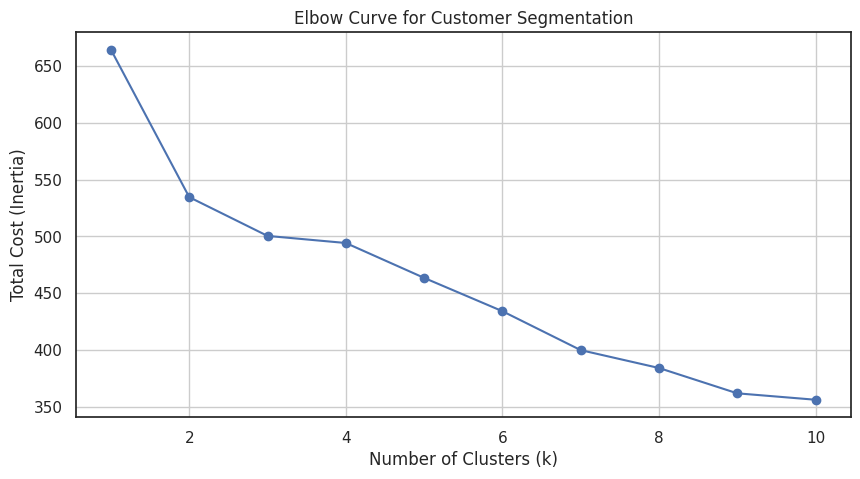

In [ ]:
# Menggunakan seluruh kolom dari df_model untuk clustering
X = df_model.values  # Ambil semua kolom

# Cek shape untuk memastikan semuanya benar
print("Shape of X:", X.shape)
print(df_model.sample(5))

# Fungsi untuk menghitung inertia (total cost dalam K-Medoids)
def calculate_inertia(X, n_clusters):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42).fit(X)
    return kmedoids.inertia_

# Mencari inertia untuk berbagai nilai k
inertias = []
K = range(1, 11)  # Mencoba k dari 1 hingga 10
for k in K:
    inertias.append(calculate_inertia(X, k))

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K, inertias, marker='o')
plt.title('Elbow Curve for Customer Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Cost (Inertia)')
plt.grid(True)
plt.show()

**Pilih k=3**

### Membuat model

array([1, 0, 2, 0, 0, 1, 0, 1, 0, 0])

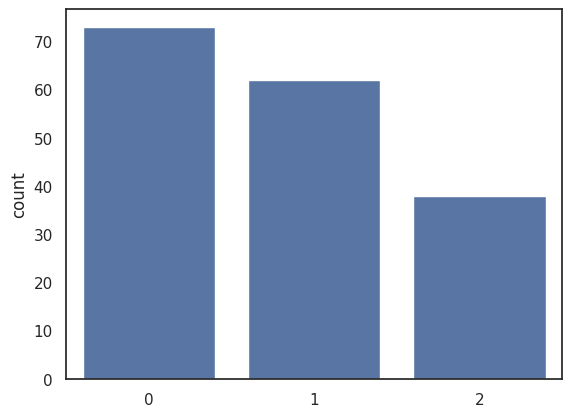

In [ ]:
kmedoids = KMedoids(n_clusters=3).fit(df_model)
C_medoid = kmedoids.predict(df_model)
sns.countplot(x=C_medoid)
C_medoid[:10]

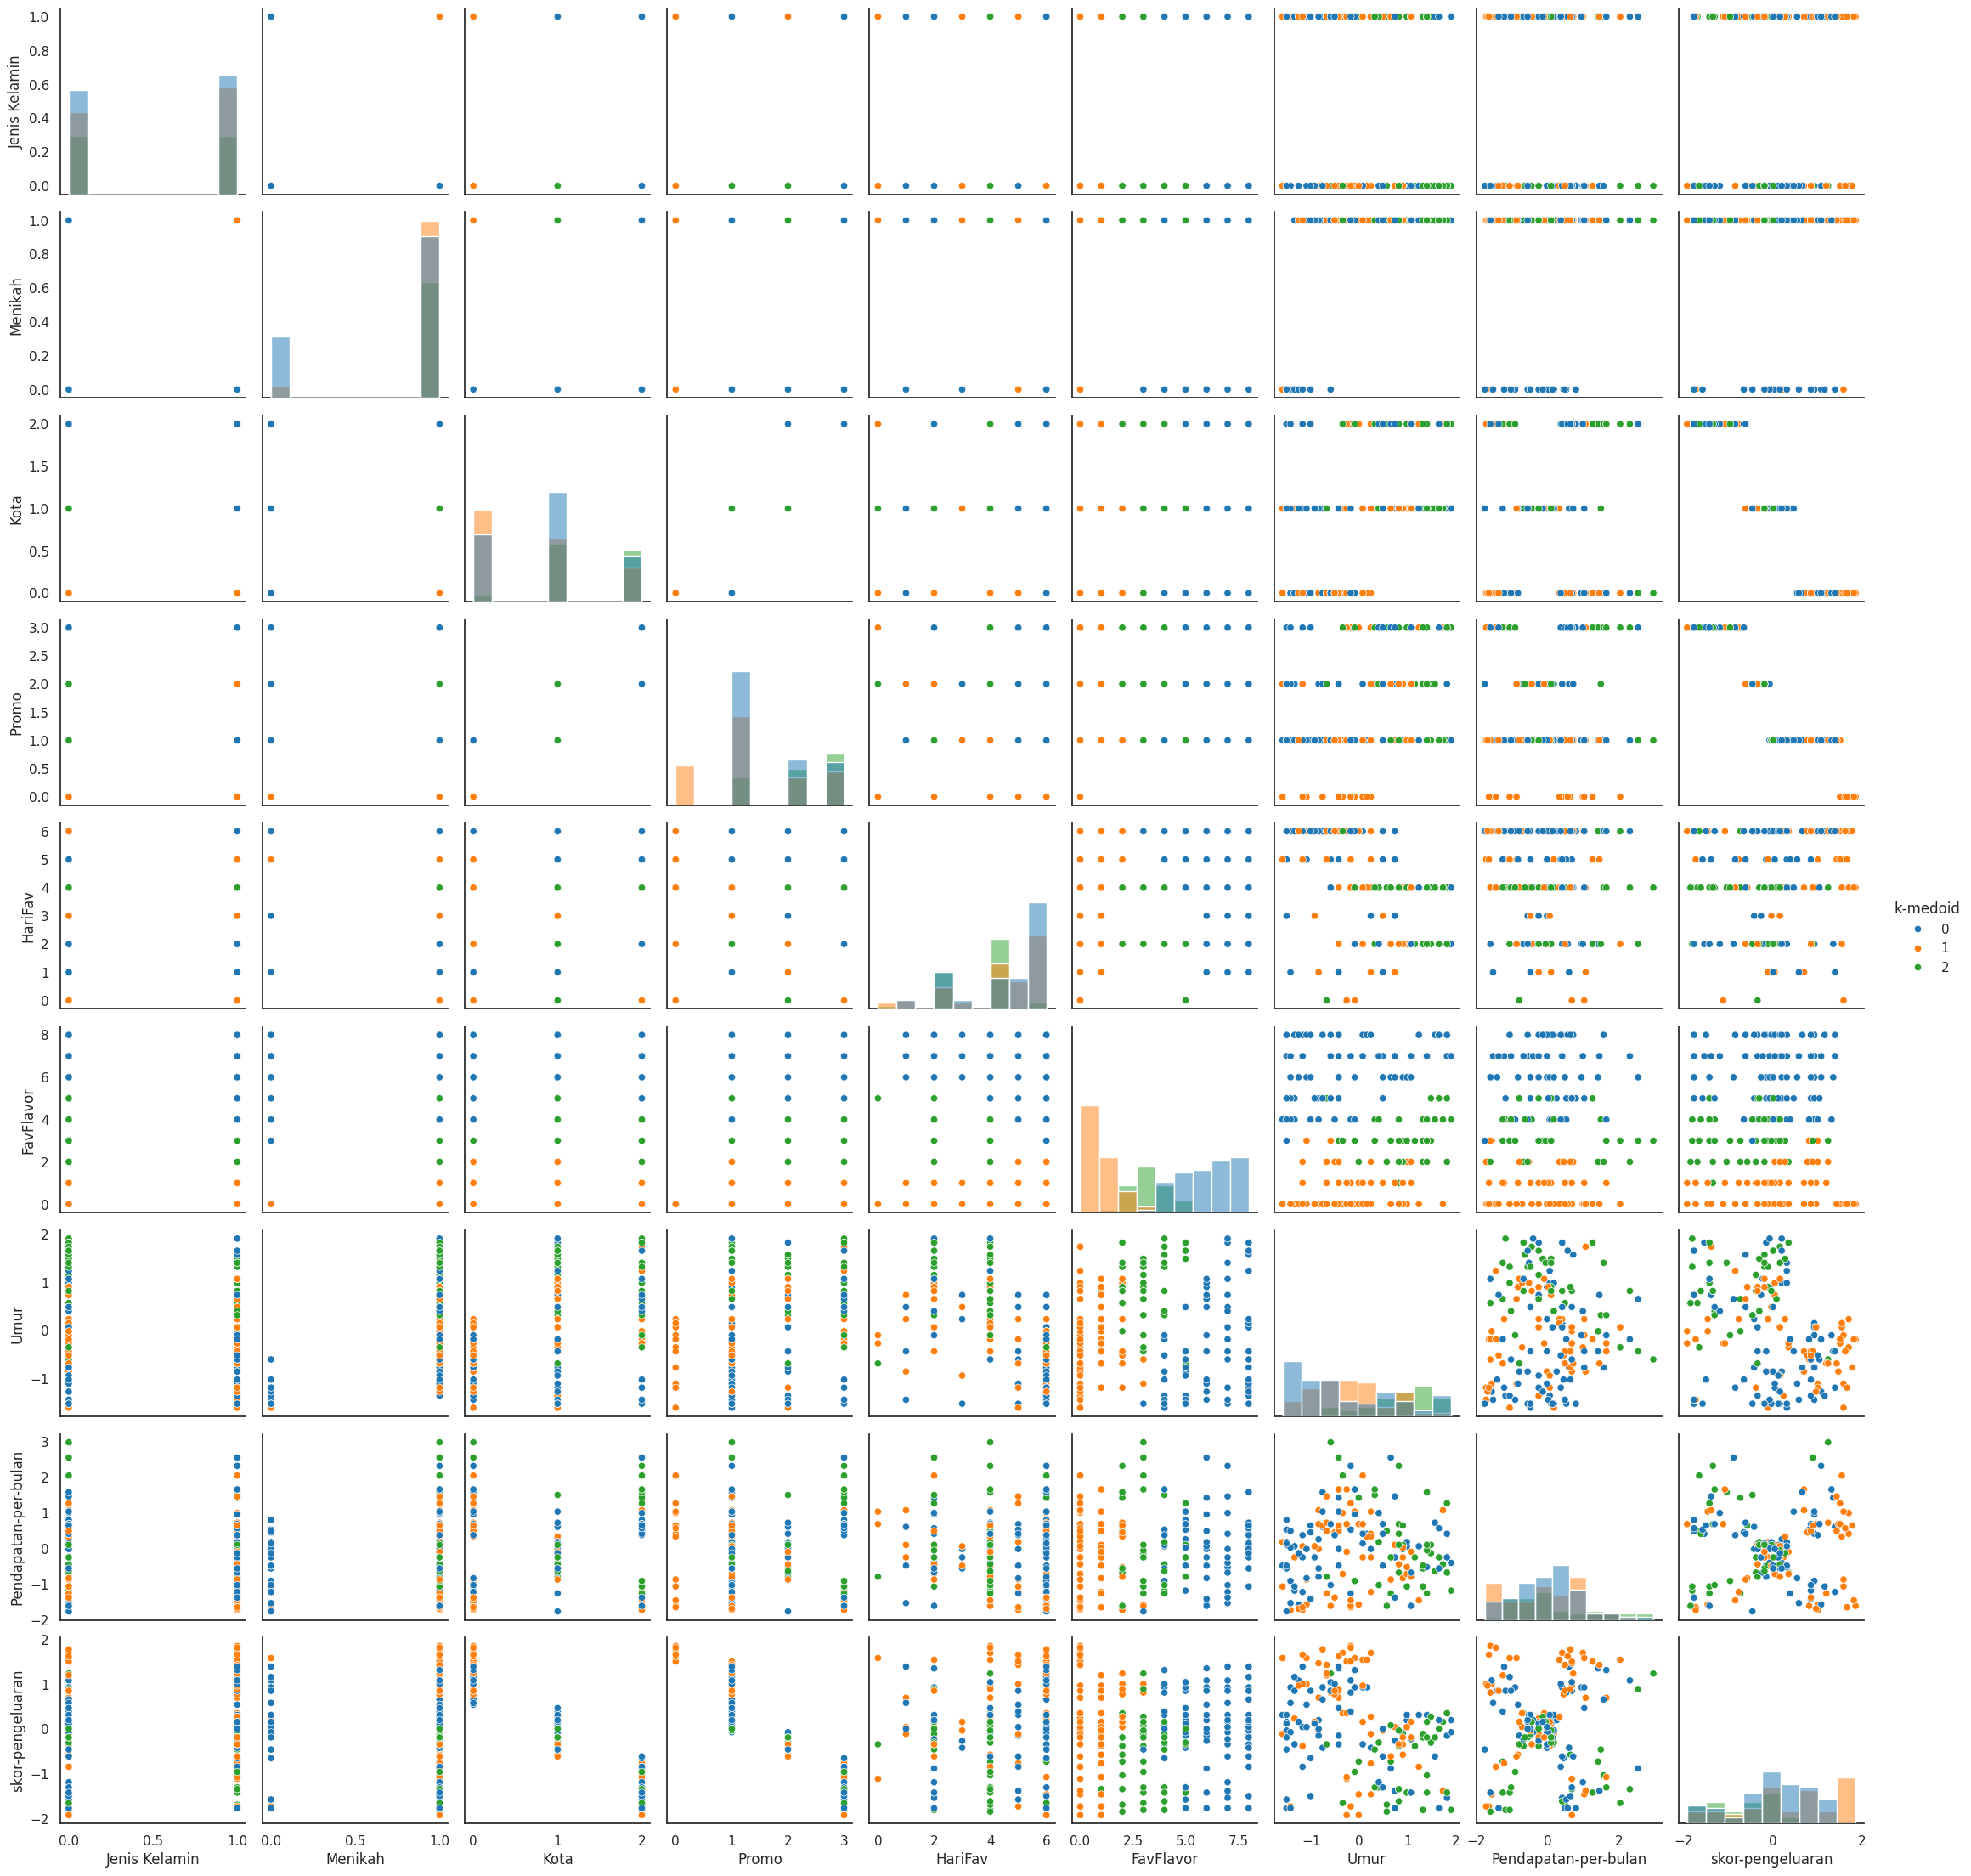

In [ ]:
df_model['k-medoid'] = C_medoid # Add the 'k-medoid' column to df_model
# Plot the clustering result
g = sns.pairplot(df_model, hue="k-medoid", diag_kind="hist", palette="tab10")

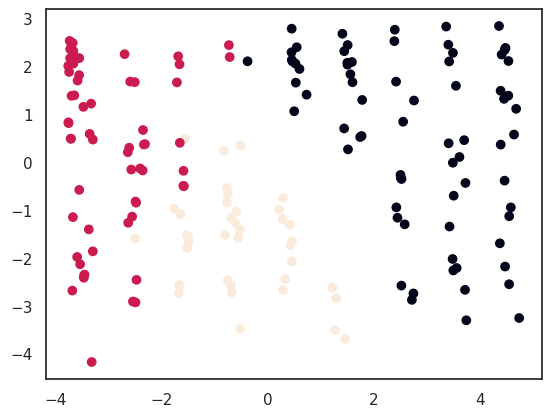

In [ ]:
import matplotlib.pyplot as plt

# Assuming X is your original data and you want to reduce it to 2 dimensions
# using a dimensionality reduction technique like PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(df_model)  # Assuming X is your original data

fig, ax = plt.subplots()
ax.scatter(X2D[:, 0], X2D[:, 1], c=C_medoid)
plt.show()

### Menggunakan model

In [ ]:
# Mendapatkan label cluster
labels = kmedoids.labels_

# Mendapatkan posisi medoids (titik yang mewakili setiap cluster)
medoids = kmedoids.cluster_centers_

# Print hasil
print("Labels cluster: ", labels)
print("Posisi Medoids: ", medoids)

Labels cluster:  [1 0 2 0 0 1 0 1 0 0 1 0 2 2 0 2 0 0 2 2 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1
 2 1 0 1 0 1 0 1 0 2 2 2 2 1 2 1 0 1 2 0 1 2 0 1 0 1 2 1 2 0 0 2 1 1 0 1 2
 0 1 0 2 0 2 1 0 1 1 1 0 1 2 1 1 2 2 1 0 0 0 0 1 0 1 2 2 0 1 2 0 1 0 2 1 0
 0 2 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 2 1 1 1 2 1 0 1 1 0 1 2 1 2 0 0 0 2 0
 0 1 0 0 0 0 0 0 1 1 2 0 2 0 0 2 0 1 0 2 1 2 0 1 0]
Posisi Medoids:  [[ 1.          1.          1.          2.          5.          6.
  -0.43202045 -0.48513131 -0.15000658]
 [ 0.          1.          1.          1.          4.          1.
   0.06846753 -0.25221445  0.15893555]
 [ 0.          1.          1.          2.          4.          3.
   1.40310213  0.09716093 -0.18862435]]


In [ ]:
# Menggabungkan data awal dan segmen pelanggan
df_final = df.copy()
df_final['cluster'] = labels
print(df_final.head(15))

   Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0         Wanita    49              13114754                52       1   
1         Wanita    32              33606557                86       1   
2           Pria    51              15983606                41       1   
3           Pria    19              12704918                55       0   
4         Wanita    38              20081967                42       1   
5         Wanita    33              29098360                95       1   
6           Pria    27              21311475                56       1   
7         Wanita    24               2049180                77       1   
8         Wanita    32              13524590                47       1   
9         Wanita    21              19262295                42       1   
11          Pria    36              29508196                92       1   
12          Pria    46              34016393                15       1   
13          Pria    60               6

In [ ]:
# Menampilkan data pelanggan berdasarkan clusternya
for i in range(0, 3):  # Sesuaikan dengan jumlah cluster yang kamu pilih
    print('\nPelanggan Cluster: {}\n'.format(i))
    print(df_final[df_final['cluster'] == i])


Pelanggan Cluster: 0

    Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
1          Wanita    32              33606557                86       1   
3            Pria    19              12704918                55       0   
4          Wanita    38              20081967                42       1   
6            Pria    27              21311475                56       1   
8          Wanita    32              13524590                47       1   
..            ...   ...                   ...               ...     ...   
187          Pria    19                     0                39       0   
189          Pria    57              12704918                56       1   
192        Wanita    31              22540983                77       1   
197        Wanita    35              43032786                79       1   
199          Pria    50               1639344                14       1   

          Kota Promo HariFav FavFlavor  cluster  
1        Depok   1.0  Ming

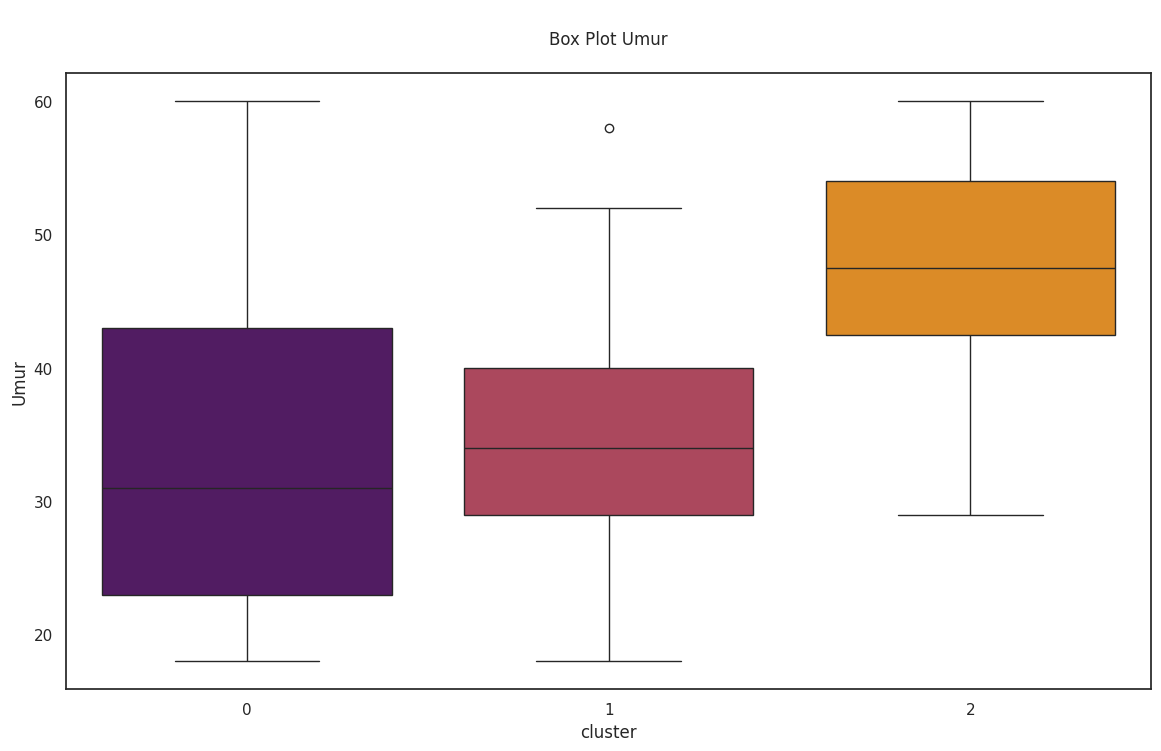

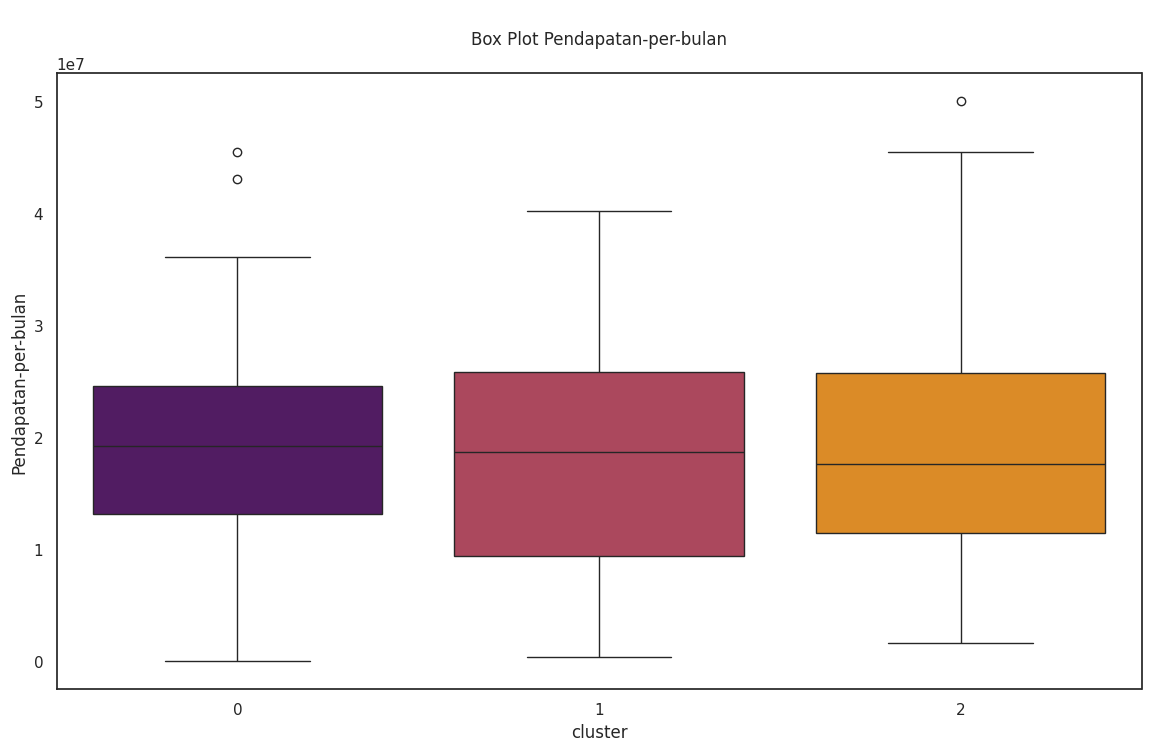

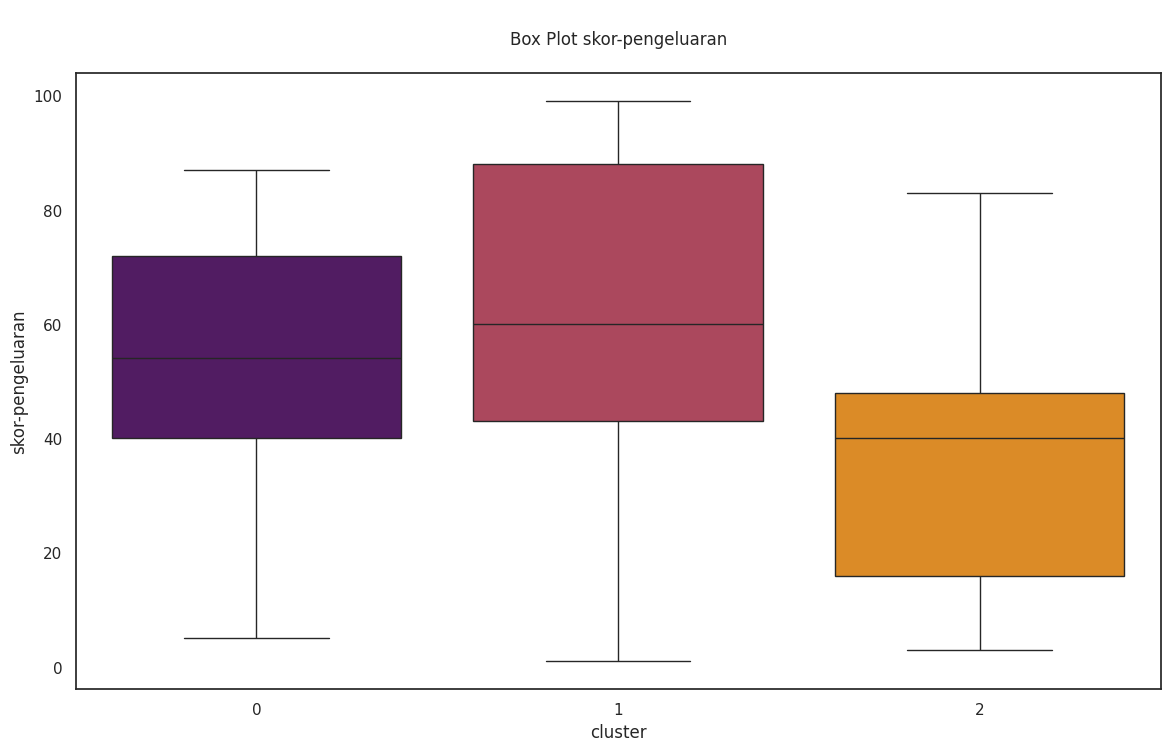

In [ ]:
for i in numerik:
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final, palette='inferno')
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

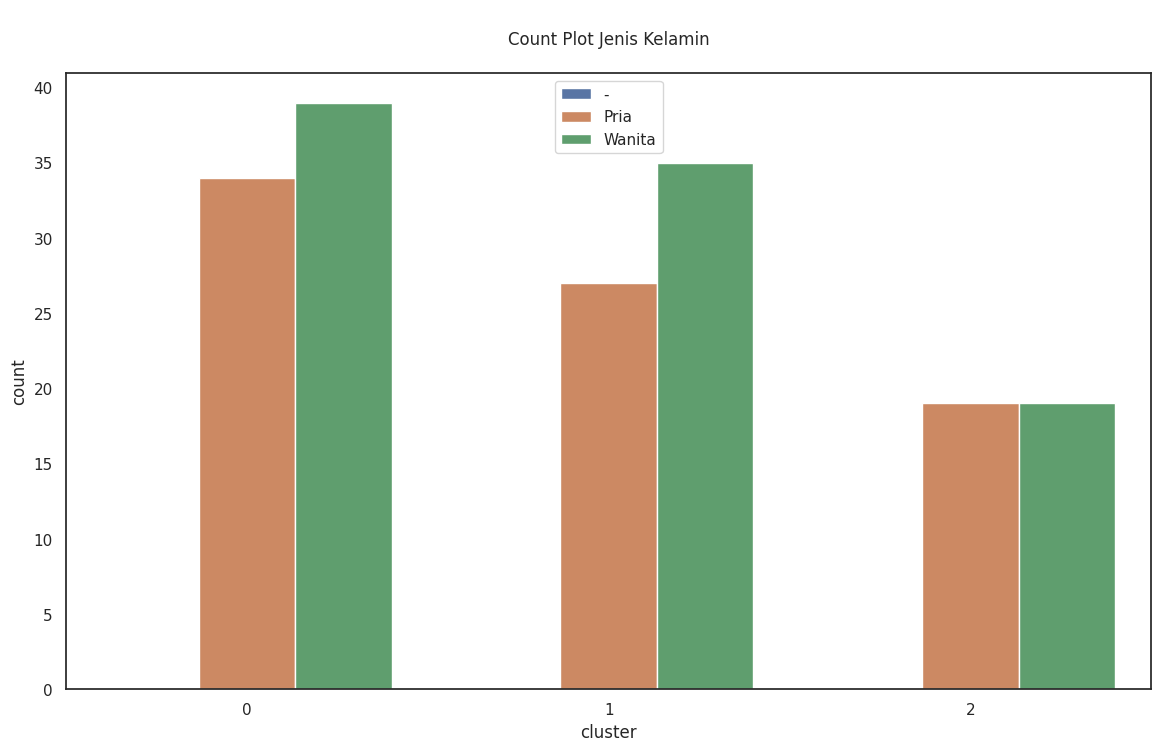

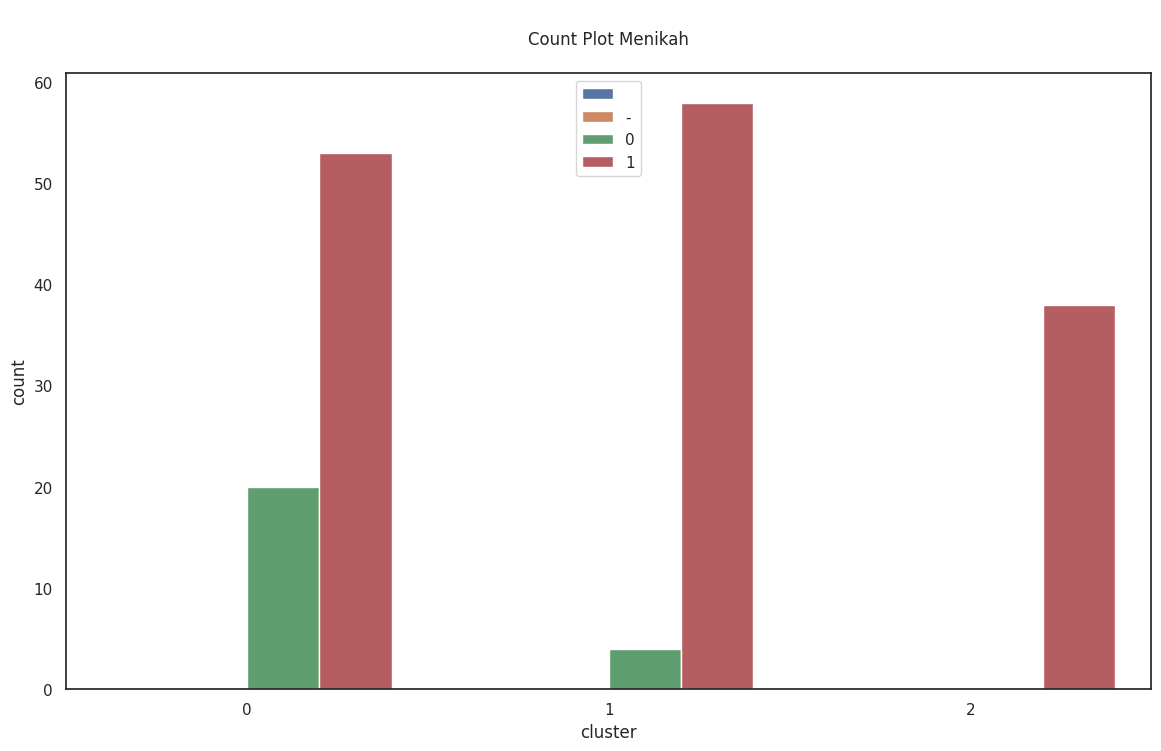

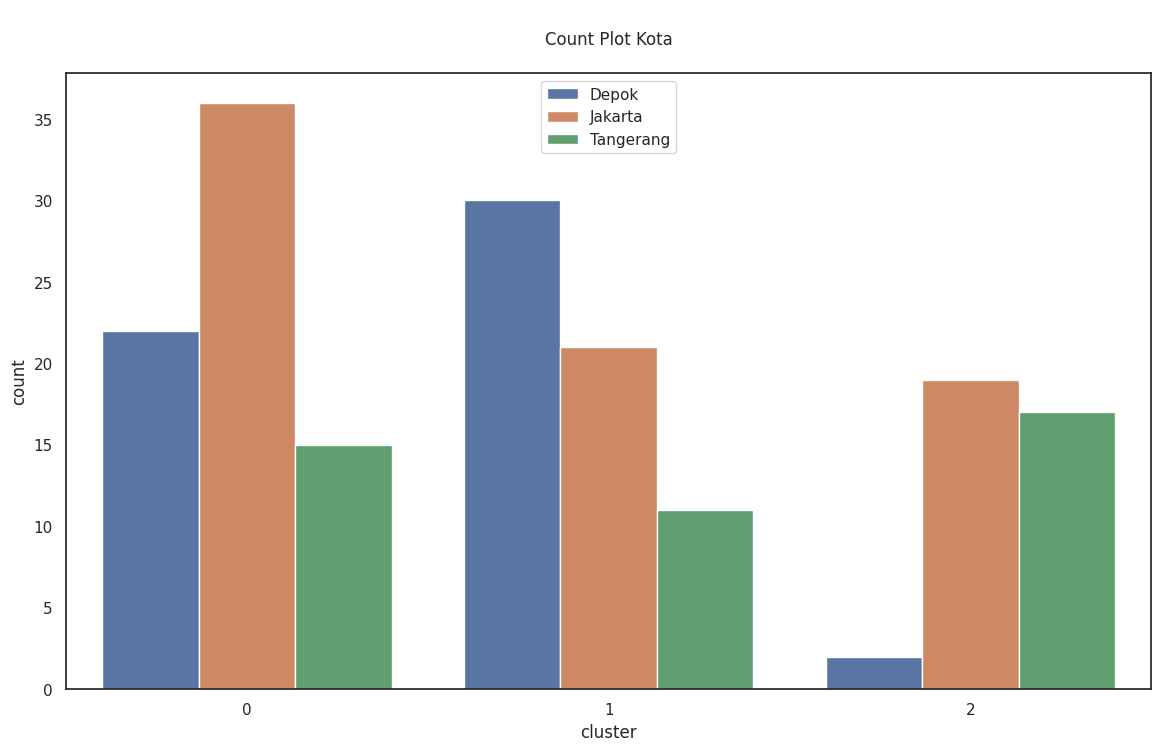

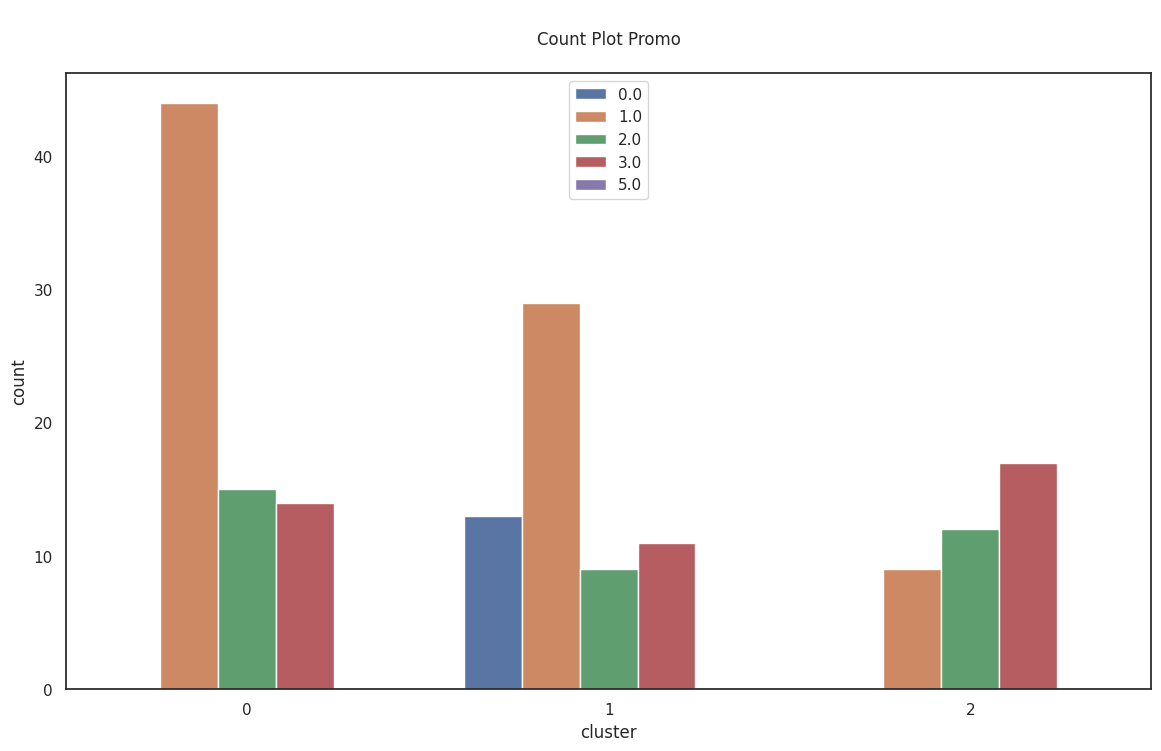

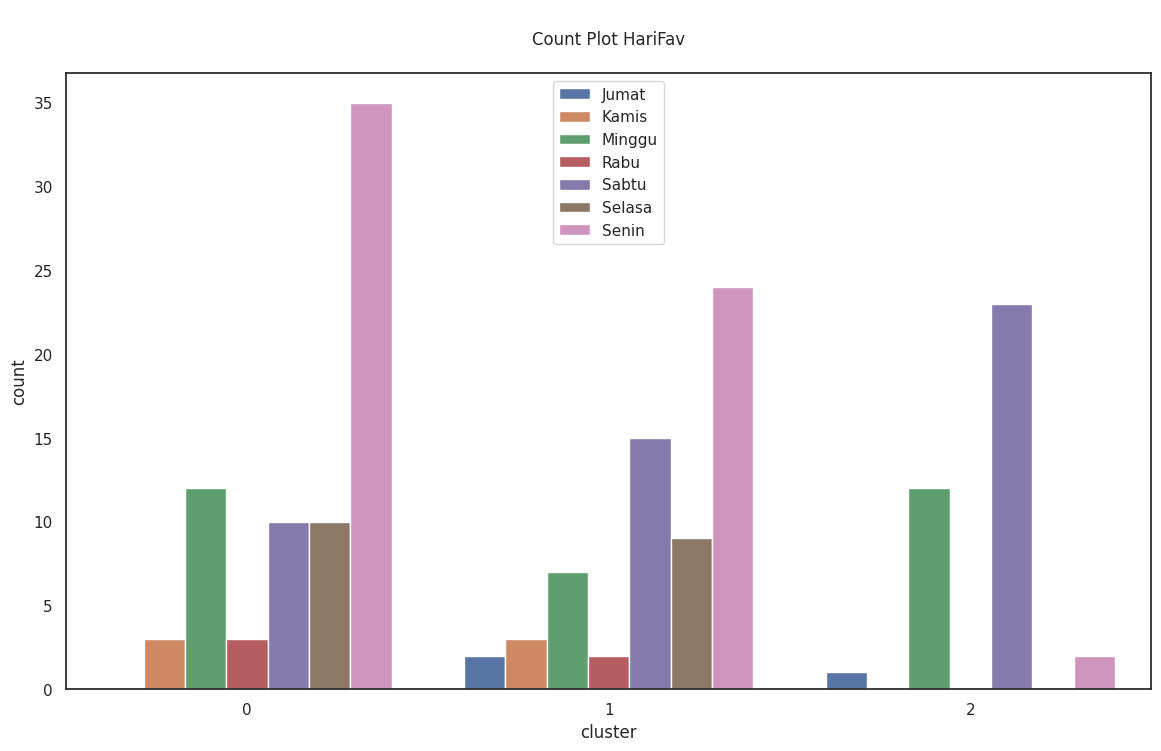

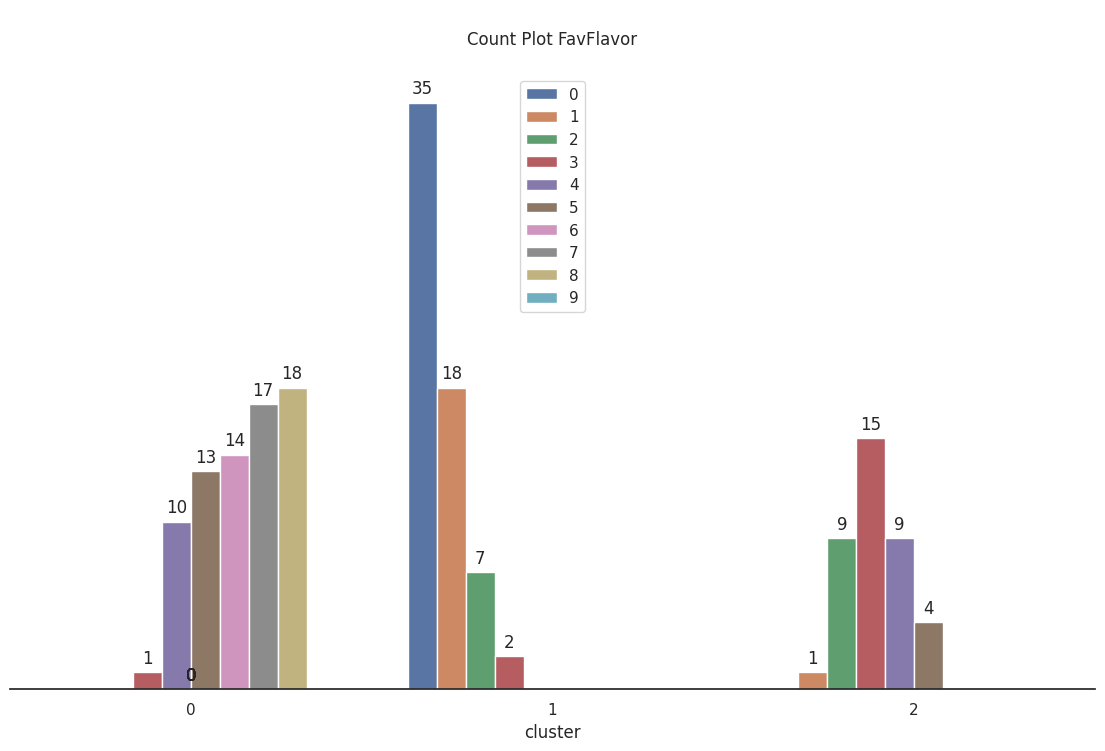

In [ ]:
for i in kategorik:
    plt.figure(figsize=(14,8))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right = True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()


### **Hasil Segmentasi (Dari Boxplot dan Barplot)**

- **Cluster 0 (Pelanggan Reguler Berpengeluaran Menengah):**
  - **Total Pelanggan**: 73
  - **Karakteristik**:  
    Pelanggan di kluster ini terdiri dari pria dan wanita dengan usia yang bervariasi, mulai dari muda hingga paruh baya. Sebagian besar sudah menikah dan domisili mereka didominasi oleh Jakarta. Mereka merupakan pelanggan yang konsisten dan setia.
  - **Perilaku Utama**:
    Mereka tidak terlalu responsif terhadap promosi berbasis diskon, lebih menghargai kualitas produk dan layanan. Sering berbelanja pada hari kerja, terutama Senin. Preferensi rasa mereka cenderung klasik seperti kombinasi tiga rasa dan kombinasi dua rasa.

- **Cluster 1 (Pelanggan Loyal Berpengeluaran Tinggi):**
  - **Total Pelanggan**: 62
  - **Karakteristik**:  
    Pelanggan ini didominasi oleh wanita dewasa muda dengan rentang usia yang lebih sempit (sekitar 30 tahun). Sebagian besar sudah menikah dan tinggal di Depok, Jakarta, dan Tangerang.
  - **Perilaku Utama**:
    Mereka juga tidak terlalu responsif terhadap promosi berbasis diskon, namun tetap rutin berbelanja, dengan hari Senin dan Sabtu sebagai hari favorit. Preferensi rasa mereka bervariasi, termasuk Vanilla, Strawberry, dan kombinasi dua rasa.

- **Cluster 2 (Pelanggan Baru atau Jarang Berkunjung):**
  - **Total Pelanggan**: 36
  - **Profil**:  
    Pelanggan ini sebagian besar lebih tua (median umur sekitar 45 tahun), sudah menikah, dan berasal dari Jakarta dan Tangerang. Mereka cenderung lebih matang dalam konsumsi dan lebih selektif dalam berbelanja.
  - **Perilaku Utama**:
    Mereka sangat responsif terhadap promosi berbasis diskon dan cenderung berbelanja pada akhir pekan, terutama Sabtu. Preferensi rasa mereka lebih condong ke rasa yang manis dan unik seperti Cokelat, Blueberry dan Bubble Gum/Cotton Candy.







## **K-Means++**

### Pilih k yang Optimal (Elbow Method)

In [ ]:
from sklearn.cluster import KMeans

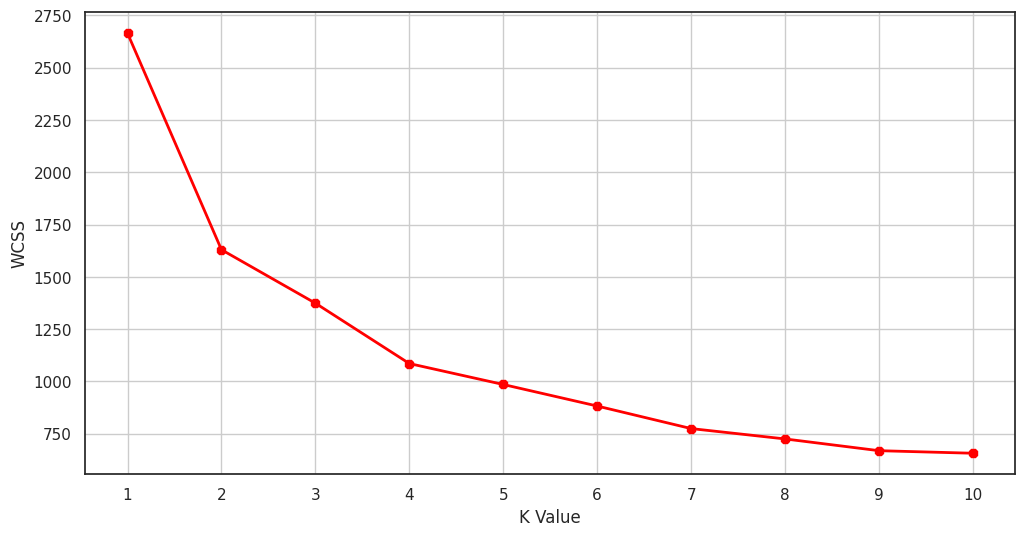

In [ ]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_model.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:

from sklearn import cluster, datasets
random_state = 99


### Membuat Model

Pilih K = 3

array([2, 0, 2, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

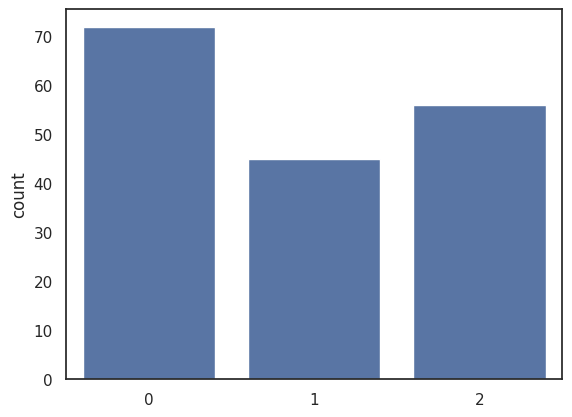

In [ ]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k = 3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(df_model)
C_kmpp = kmPP.predict(df_model)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

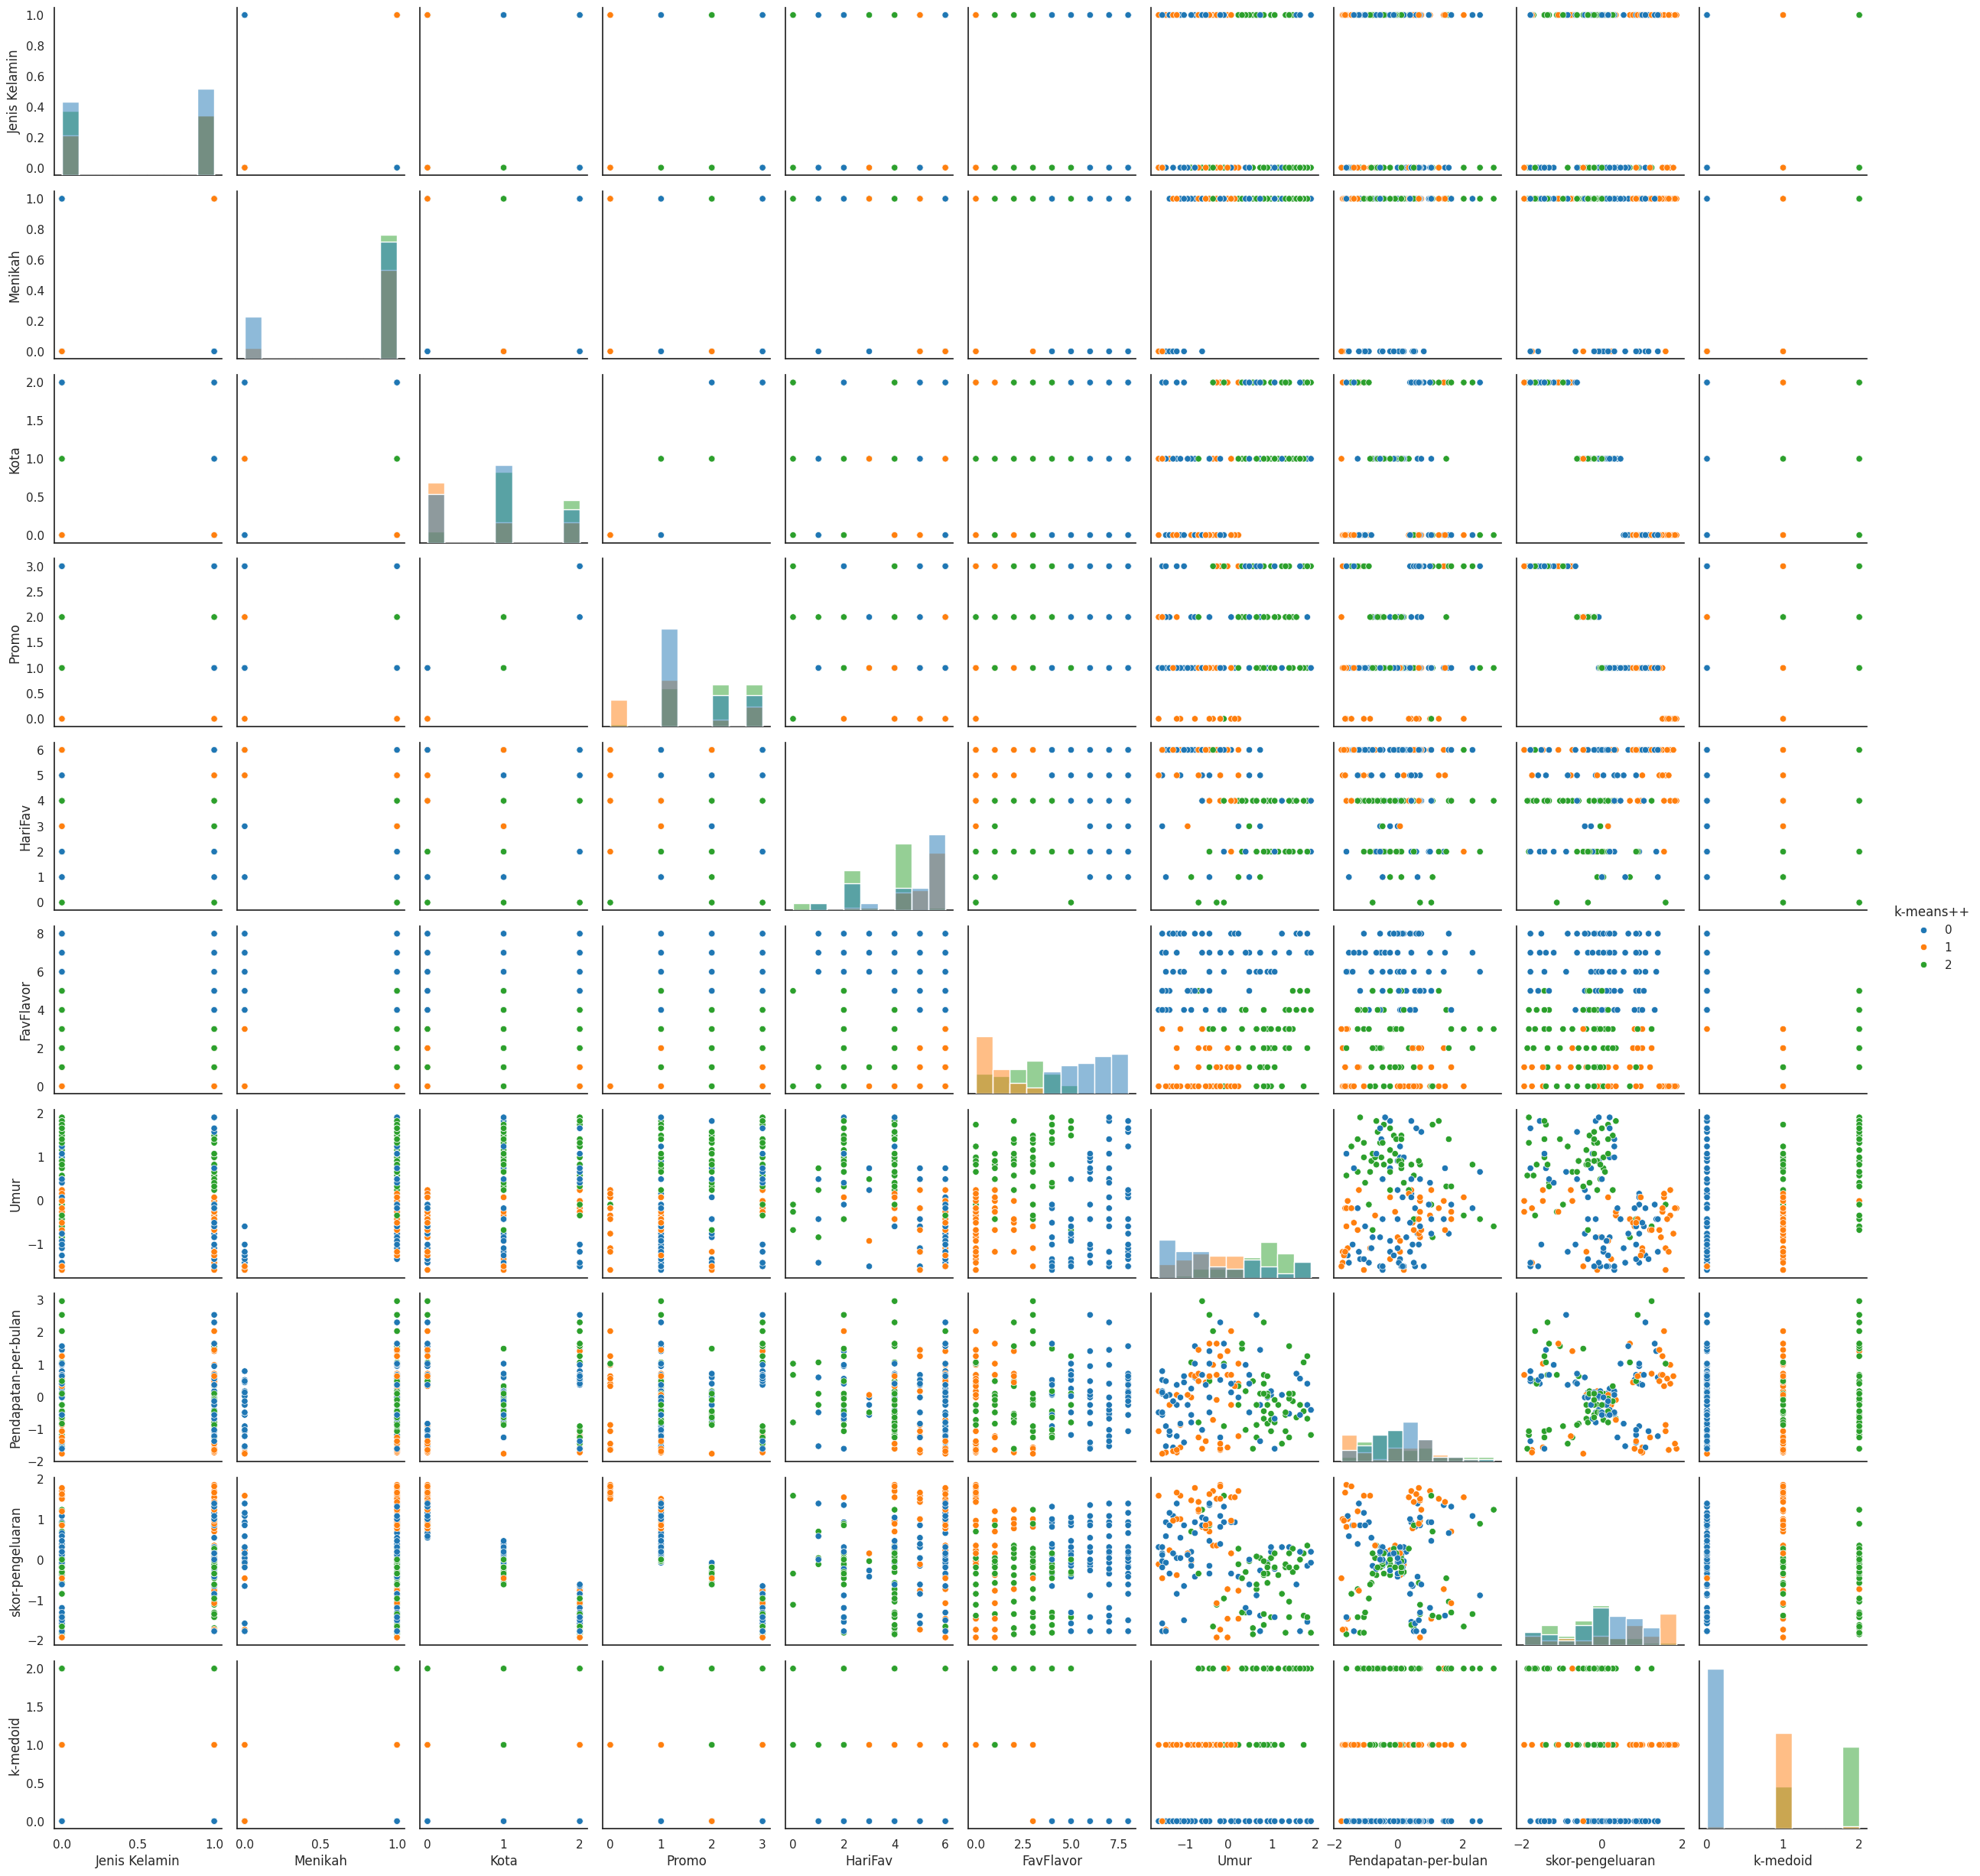

In [ ]:
df_model['k-means++'] = C_kmpp
# Plot the clustering result
g = sns.pairplot(df_model, hue="k-means++", diag_kind="hist", palette="tab10")

In [ ]:
df_model

,Jenis Kelamin,Menikah,Kota,Promo,HariFav,FavFlavor,Umur,Pendapatan-per-bulan,skor-pengeluaran,k-medoid,k-means++
0,1,1,1,1,4,2,0.986029,-0.523951,0.043082,1,2
1,1,1,0,1,2,6,-0.432020,1.417023,1.356086,0,0
2,0,1,1,2,2,3,1.152858,-0.252214,-0.381713,2,2
3,0,0,1,1,3,7,-1.516411,-0.562770,0.158936,0,0
4,1,1,1,2,6,8,0.068468,0.135980,-0.343095,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,0,1,0,1,6,0,-0.515435,-1.377979,0.854055,1,1
196,0,1,1,1,2,5,1.653346,-0.252214,0.004464,2,2
197,1,1,0,1,6,7,-0.181776,2.309871,1.085762,0,0
198,1,1,0,0,5,0,-1.182752,-1.649716,1.665028,1,1


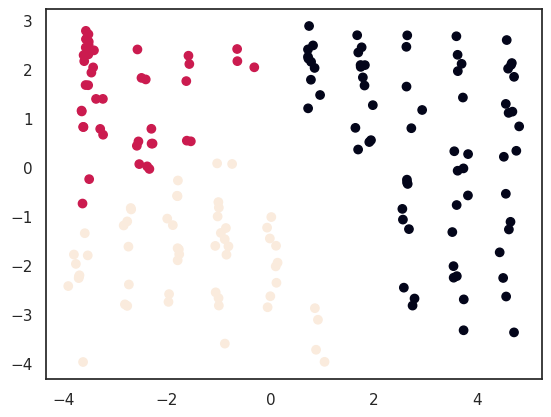

In [ ]:
import matplotlib.pyplot as plt

# Assuming X is your original data and you want to reduce it to 2 dimensions
# using a dimensionality reduction technique like PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(df_model)  # Assuming X is your original data

fig, ax = plt.subplots()
ax.scatter(X2D[:, 0], X2D[:, 1], c=C_kmpp)
plt.show()

### Menggunakan Model


In [ ]:
# Mendapatkan label cluster
label = kmPP.labels_

# Mendapatkan posisi kmeans_ (titik yang mewakili setiap cluster)
kmeans_ = kmPP.cluster_centers_

# Print hasil
print("label cluster: ", label)
print("Posisi kmeans++: ", kmeans_)

label cluster:  [2 0 2 0 0 1 0 1 0 0 2 0 2 2 0 2 0 0 2 2 0 1 1 1 0 0 1 2 0 1 0 1 1 0 0 1 1
 1 1 0 1 0 1 0 1 0 2 2 2 2 1 2 2 0 2 2 0 2 2 0 1 0 2 2 2 2 0 0 2 1 1 0 1 2
 0 2 0 2 0 2 1 0 2 1 2 0 2 2 2 2 2 2 1 0 0 0 0 1 0 2 2 2 0 1 2 0 1 0 2 1 0
 0 2 1 0 0 0 0 1 1 0 0 1 0 0 2 0 0 1 2 1 1 1 2 1 0 2 1 0 1 2 1 2 0 0 0 2 0
 0 2 0 0 0 0 0 0 2 1 2 0 2 0 1 2 0 1 0 2 1 2 0 1 0]
Posisi kmeans++:  [[ 5.41666667e-01  7.36111111e-01  9.02777778e-01  1.58333333e+00
   4.58333333e+00  6.27777778e+00 -2.65191125e-01  5.18715049e-02
   2.10915756e-02  3.33066907e-16]
 [ 6.00000000e-01  8.88888889e-01  6.00000000e-01  1.20000000e+00
   5.28888889e+00  6.66666667e-01 -5.56215616e-01 -1.27992095e-01
   5.26233417e-01  1.00000000e+00]
 [ 4.82142857e-01  1.00000000e+00  1.25000000e+00  2.00000000e+00
   3.00000000e+00  2.33928571e+00  7.87918995e-01  3.61588557e-02
  -4.49983879e-01  1.66071429e+00]]


In [ ]:
# Menggabungkan data awal dan segmen pelanggan
df_kmeans_pp = df.copy()
df_kmeans_pp['cluster'] = label
print(df_kmeans_pp.head(15))

   Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0         Wanita    49              13114754                52       1   
1         Wanita    32              33606557                86       1   
2           Pria    51              15983606                41       1   
3           Pria    19              12704918                55       0   
4         Wanita    38              20081967                42       1   
5         Wanita    33              29098360                95       1   
6           Pria    27              21311475                56       1   
7         Wanita    24               2049180                77       1   
8         Wanita    32              13524590                47       1   
9         Wanita    21              19262295                42       1   
11          Pria    36              29508196                92       1   
12          Pria    46              34016393                15       1   
13          Pria    60               6

In [ ]:
# Menampilkan data pelanggan berdasarkan clusternya
# Sesuaikan range dengan jumlah cluster yang ada (misalnya jika k = 3, gunakan range(0, 3))
for i in range(0, 3):  # Sesuaikan dengan jumlah cluster yang kamu pilih
    print('\nPelanggan Cluster: {}\n'.format(i))
    print(df_kmeans_pp[df_kmeans_pp['cluster'] == i])  # Pastikan kolom bernama 'Cluster'



Pelanggan Cluster: 0

    Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
1          Wanita    32              33606557                86       1   
3            Pria    19              12704918                55       0   
4          Wanita    38              20081967                42       1   
6            Pria    27              21311475                56       1   
8          Wanita    32              13524590                47       1   
..            ...   ...                   ...               ...     ...   
186        Wanita    46               4098360                 5       1   
189          Pria    57              12704918                56       1   
192        Wanita    31              22540983                77       1   
197        Wanita    35              43032786                79       1   
199          Pria    50               1639344                14       1   

          Kota Promo HariFav FavFlavor  cluster  
1        Depok   1.0  Ming

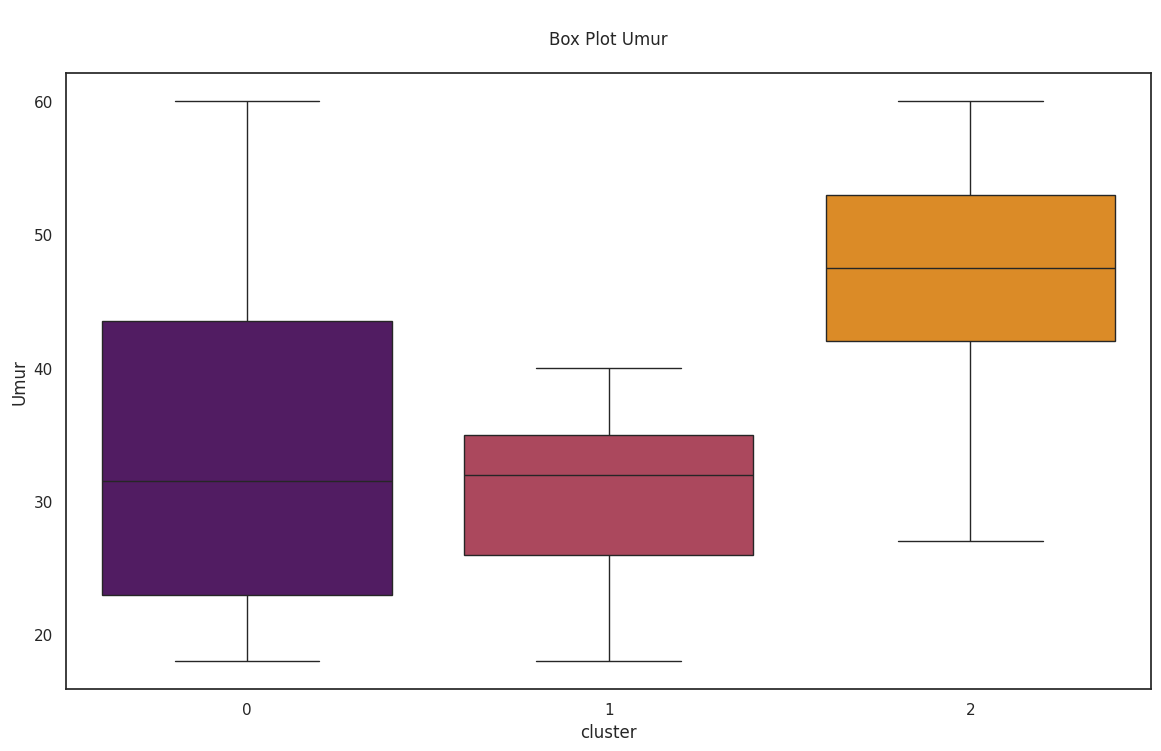

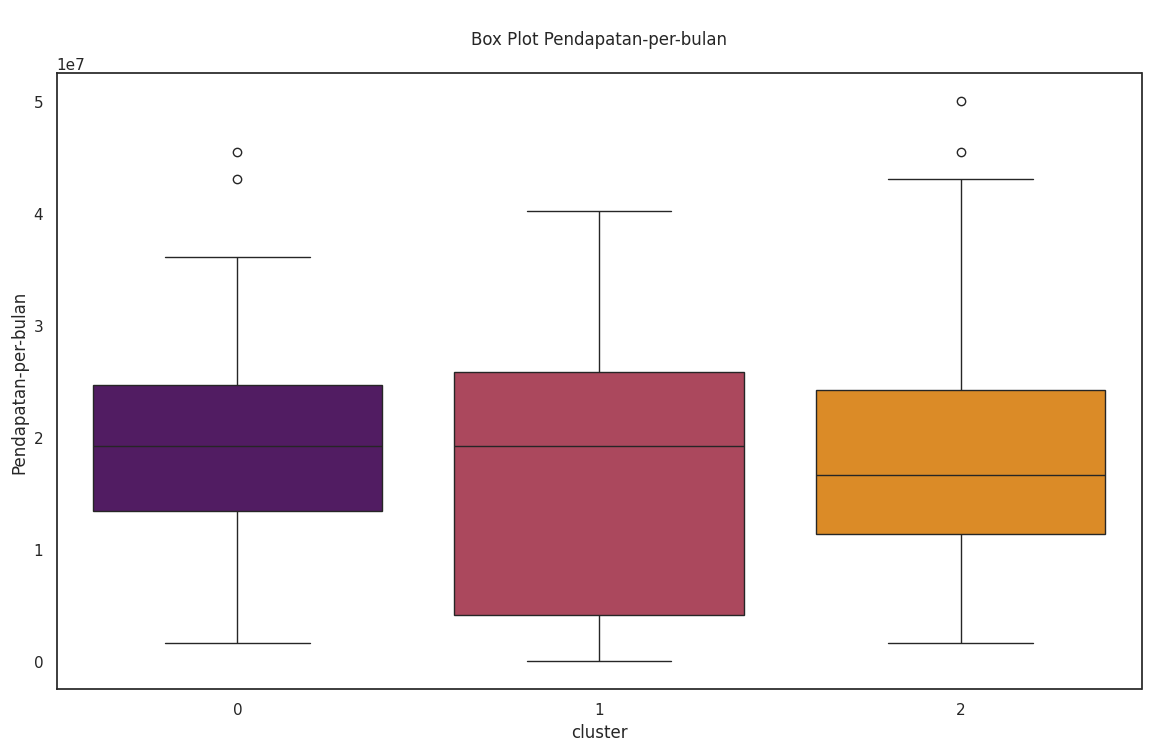

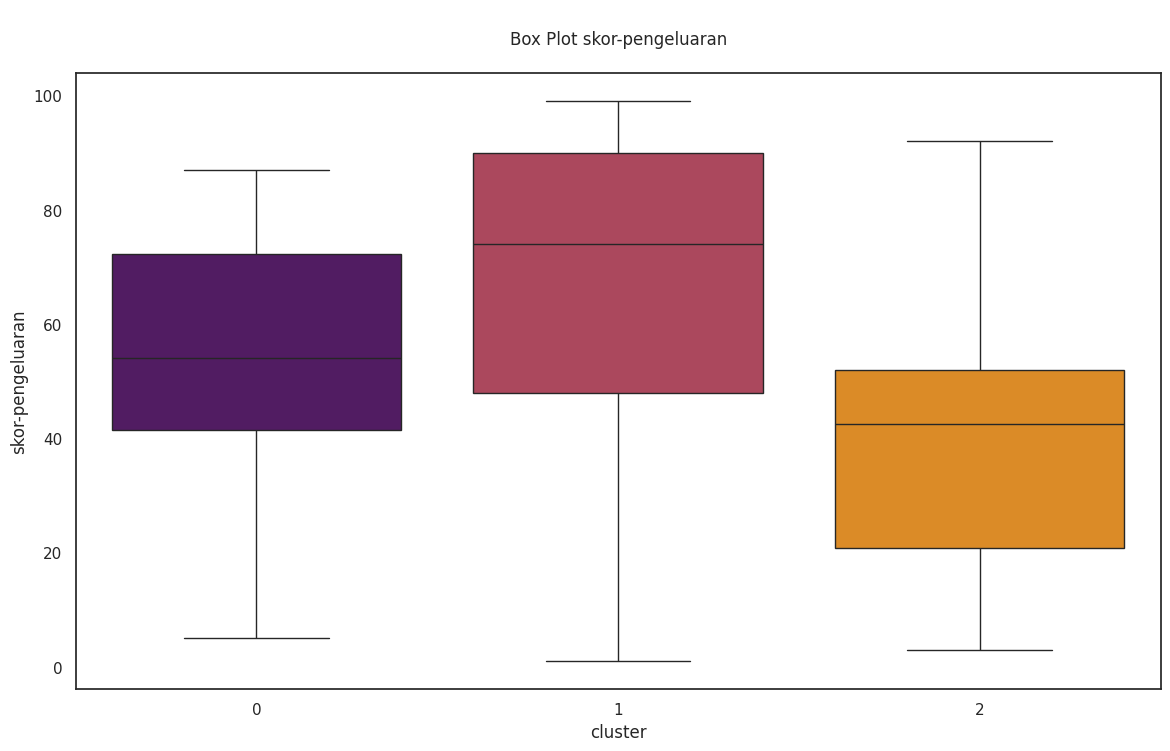

In [ ]:
for i in numerik:
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_kmeans_pp, palette='inferno')
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

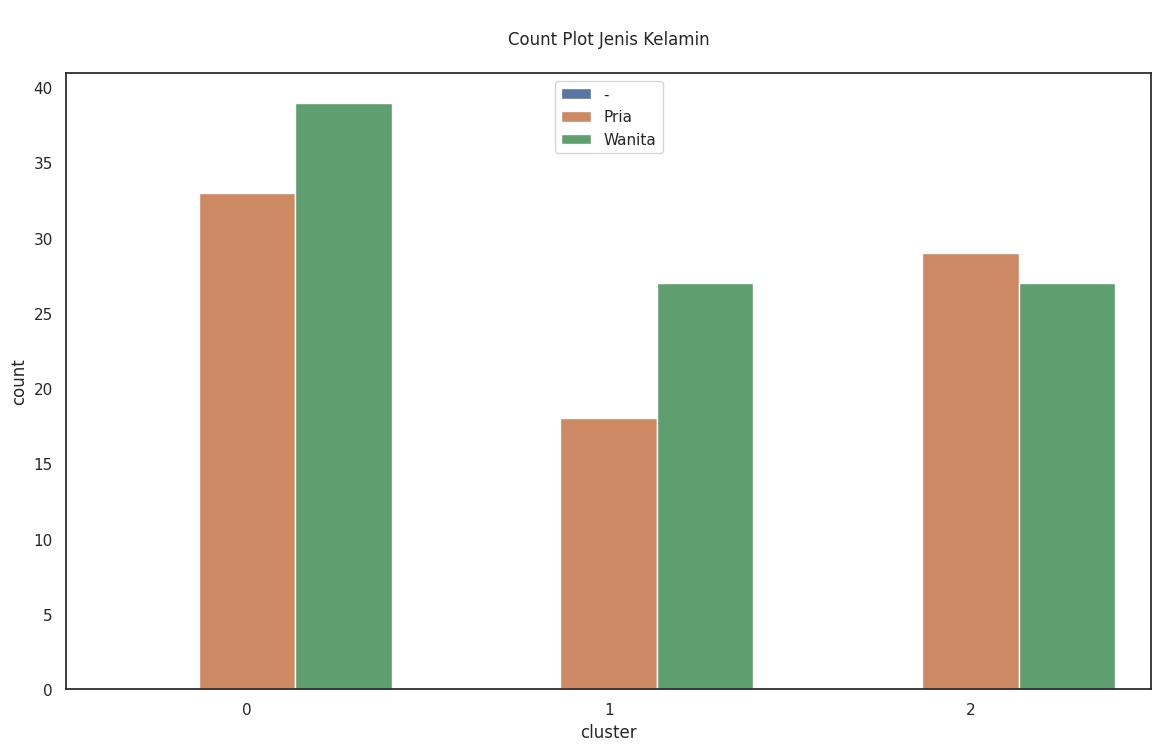

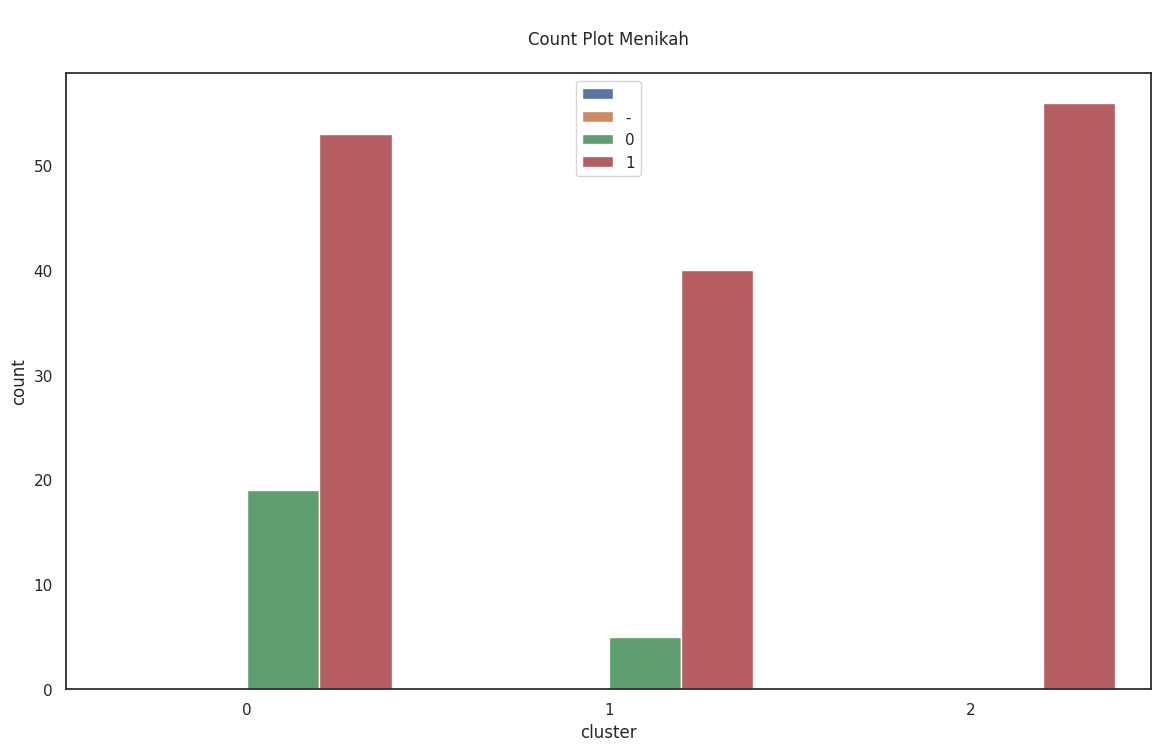

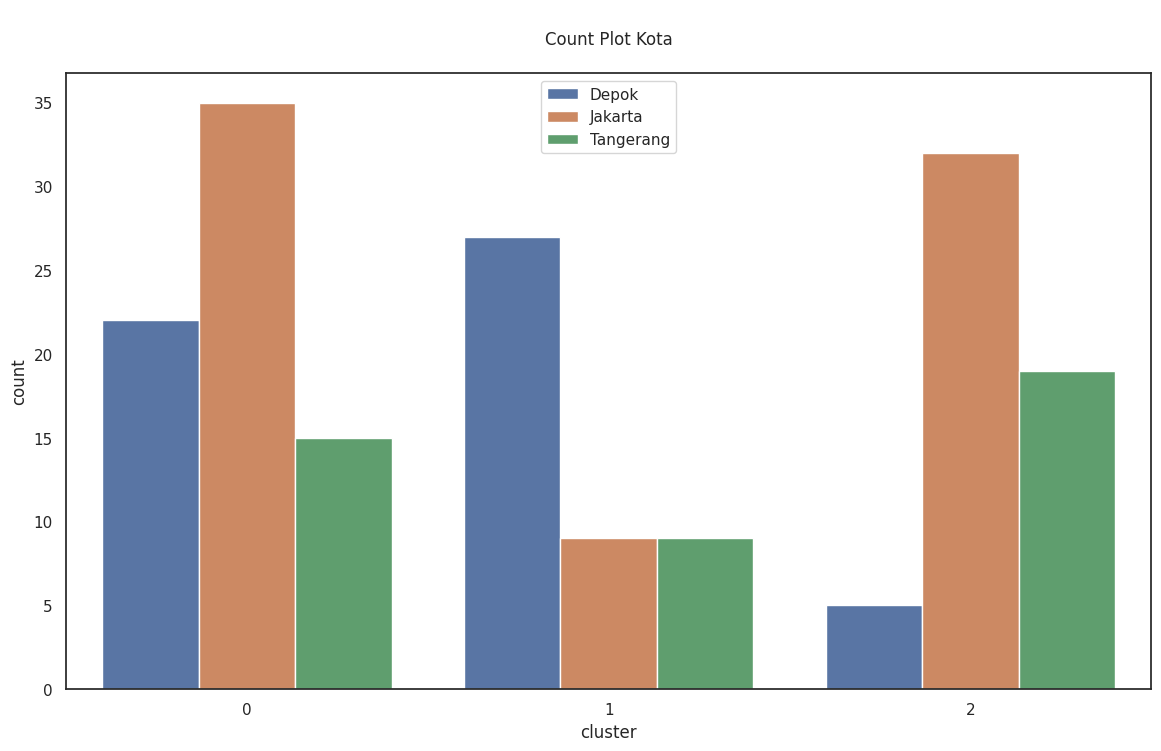

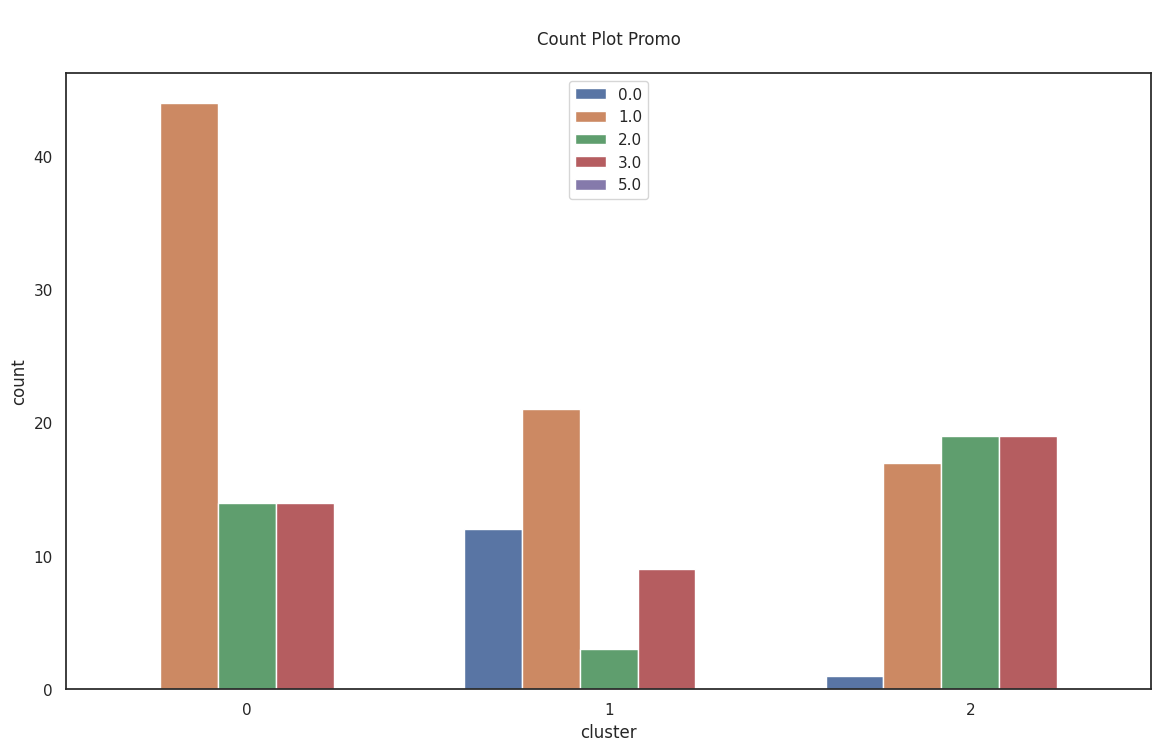

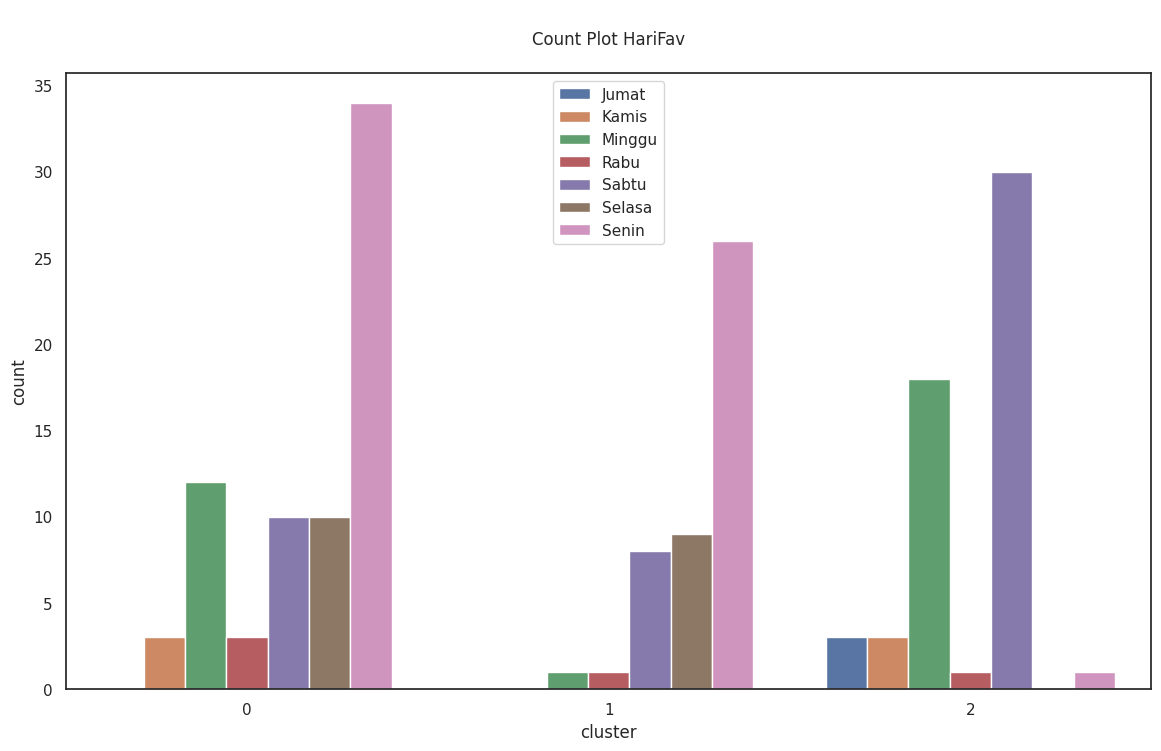

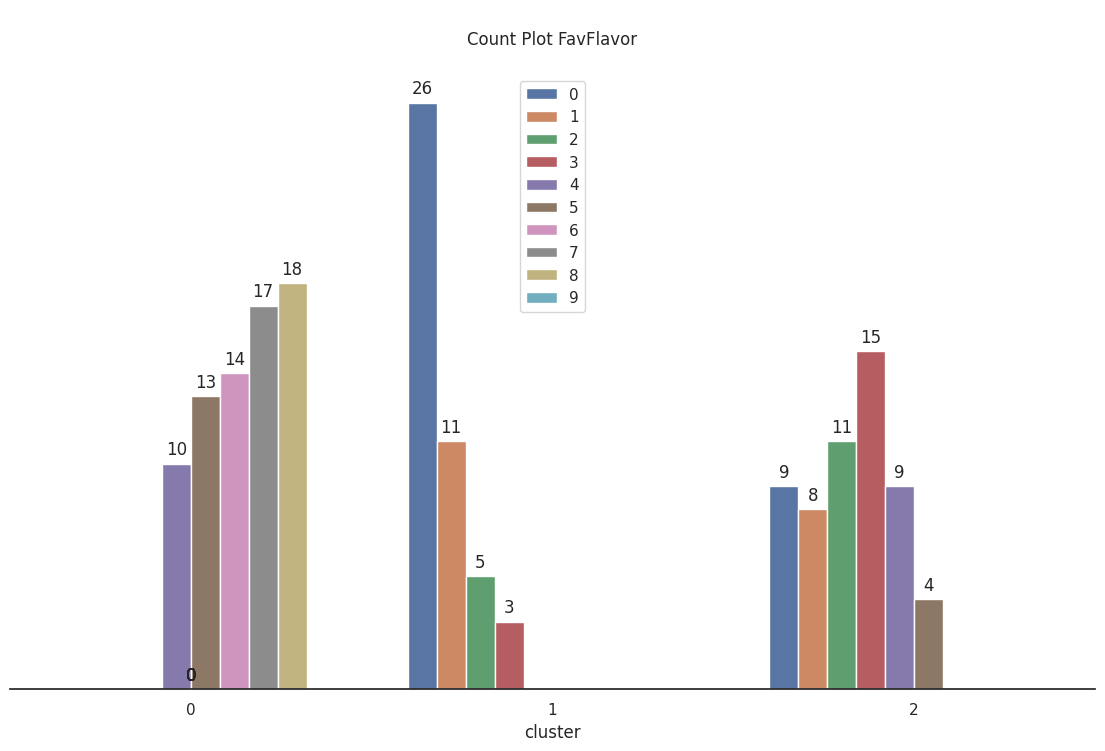

In [ ]:
for i in kategorik:
    plt.figure(figsize=(14,8))
    ax = sns.countplot(data = df_kmeans_pp, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right = True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()


### **Hasil Segmentasi (Dari Boxplot dan Barplot)**

- **Cluster 0:**
  - **Total Pelanggan**: 71
  - **Profil**:  
    Pelanggan dalam kelompok ini berusia lebih tua (rata-rata 22-43 tahun), mayoritas sudah menikah, dan memiliki pendapatan menengah hingga tinggi. Mereka adalah pelanggan setia, terutama berasal dari **Depok dan Jakarta**.
  - **Perilaku Utama**:
    - **Penggunaan Promo**: Sebagian besar pelanggan jarang menggunakan kode promo.
    - **Hari Favorit**: Hari favorit mereka adalah **Senin** dan **Minggu**.
    - **Rasa Favorit**: Mereka sering memesan rasa **mix 2 flavors** dan **mix 3 flavors**.
    - **Skor Pengeluaran**: Pengeluaran sedang hingga tinggi, menunjukkan keterlibatan yang baik dengan produk MixITup.

- **Cluster 1:**
  - **Total Pelanggan**: 44
  - **Profil**:  
    Kelompok ini berusia lebih tua (rata-rata 26-34 tahun), mayoritas sudah menikah, dan memiliki pendapatan rendah hingga tinggi. Mereka adalah pelanggan setia, terutama dari **Depok**.
  - **Perilaku Utama**:
    - **Penggunaan Promo**: Sama seperti cluster sebelumnya, mereka jarang menggunakan kode promo.
    - **Hari Favorit**: Hari favorit mereka adalah **Senin** dan **Selasa**.
    - **Rasa Favorit**: Mereka sering memesan rasa **vanila** dan **stroberi**.
    - **Skor Pengeluaran**: Pengeluaran sedang hingga tinggi, dan lebih tinggi dibandingkan dengan Cluster 1, menunjukkan keterlibatan yang sangat baik dengan produk MixITup.

- **Cluster 2:**
  - **Total Pelanggan**: 54
  - **Profil**:  
    Sebagian besar kelompok ini terdiri dari pelanggan yang lebih tua (usia 42-53 tahun), mayoritas sudah menikah, dengan jumlah pria dan wanita yang seimbang (sedikit lebih unggul pria). Banyak dari mereka tinggal di **Tangerang** dan **Jakarta**.
  - **Perilaku Utama**:
    - **Penggunaan Promo**: Sebagian besar pelanggan ini sering menggunakan kode promo.
    - **Hari Favorit**: Hari favorit mereka adalah **Sabtu** dan **Minggu**.
    - **Rasa Favorit**: Mereka sering memesan rasa **cokelat** dan **blueberry**.
    - **Skor Pengeluaran**: Pengeluaran mereka rendah hingga sedang, meskipun beberapa pelanggan berpenghasilan tinggi menunjukkan keterlibatan yang lebih rendah.







# **Insight dan Rekomendasi**

**Karena data yang kami punya mengandung outlier dan metode K-Medoids lebih robust, disini kami memutuskan untuk menggunakan clustering metode K-Medoids untuk menarik insight dan rekomendasi.**


## **Insight**

- **Segmentasi Pelanggan**:
  - **Cluster 0** mewakili pelanggan setia yang jarang menggunakan promo, dengan preferensi untuk hari Senin dan Minggu serta sering memesan mix 2 dan 3 flavors.
  - **Cluster 1** terdiri dari pelanggan setia dengan pengeluaran tinggi dan lebih memilih rasa klasik seperti vanila dan stroberi, serta sering berkunjung di hari Senin dan Sabtu.
  - **Cluster 2** adalah pelanggan yang lebih sensitif terhadap promo, dengan preferensi hari Sabtu dan Minggu, serta suka memilih rasa yang lebih unik seperti cokelat, blueberry, dan bubble-gum.

- **Strategi Promosi**:
  - **Cluster 0** menunjukkan potensi pengeluaran yang stabil, meski jarang menggunakan promo. Peningkatan program loyalitas dan penawaran eksklusif di hari Senin dan Minggu dapat memperkuat hubungan dengan pelanggan ini.
  - **Cluster 1** memiliki pengeluaran lebih tinggi dari cluster lainnya, sehingga promosi yang lebih personal pada rasa favorit mereka (vanila dan stroberi) dan pada hari Senin serta Sabtu dapat meningkatkan retensi.
  - **Cluster 2** sangat responsif terhadap promo. Kampanye promo yang agresif di hari Sabtu dan Minggu, serta promo bundling dengan rasa-rasa unik, dapat mendorong keterlibatan dan meningkatkan pengeluaran dari kelompok ini.

- **Preferensi Rasa**:
  - Rasa **mix 2 flavors** dan **mix 3 flavors** adalah favorit di **Cluster 0**, sedangkan **vanila** dan **stroberi** lebih populer di **Cluster 1**. Pelanggan **Cluster 2** memiliki preferensi yang lebih beragam dengan rasa seperti **cokelat**, **blueberry**, dan **bubble-gum**.




## **Rekomendasi**

- **Strategi Pemasaran Berbasis Cluster**:
  - Untuk **Cluster 0**, program loyalitas dan penawaran eksklusif pada hari Senin dan Minggu dapat mendorong lebih banyak kunjungan dari pelanggan yang sudah memiliki pengeluaran stabil.
  - **Cluster 1** memerlukan pendekatan personalisasi, dengan fokus pada rasa favorit dan penawaran hari kerja yang sesuai dengan kebiasaan belanja mereka.
  - **Cluster 2** merespon dengan baik terhadap promo, sehingga bundling dan penawaran khusus pada rasa-rasa unik bisa meningkatkan keterlibatan.

- **Optimasi Penawaran Rasa**:
  - Dengan fokus pada preferensi rasa yang berbeda antar cluster, MixITup dapat menyesuaikan kampanye rasa baru atau musiman untuk menarik lebih banyak pelanggan dari setiap segmen.

- **Pengembangan Program Loyalitas dan Promo**:
  - Menyempurnakan program loyalitas untuk pelanggan **Cluster 0** dan **Cluster 1**, serta menawarkan promosi yang lebih beragam untuk **Cluster 2**, akan membantu MixITup dalam meningkatkan frekuensi pembelian dan pengeluaran per transaksi.

# **Kesimpulan**

Kesimpulan:

Berdasarkan hasil segmentasi pelanggan yang dilakukan menggunakan metode K-Medoids, MixITup dapat mengelompokkan pelanggan menjadi tiga cluster utama: Pelanggan Reguler Berpengeluaran Menengah (Cluster 0), Pelanggan Loyal Berpengeluaran Tinggi (Cluster 1), dan Pelanggan Baru atau Jarang Berkunjung (Cluster 2). Masing-masing cluster memiliki karakteristik yang berbeda dalam hal preferensi rasa, respons terhadap promosi, serta kebiasaan berbelanja.

Strategi promosi yang disarankan adalah memperkuat program loyalitas dan memberikan penawaran eksklusif untuk Cluster 0 dan Cluster 1, serta menawarkan kampanye promo yang lebih agresif untuk Cluster 2, terutama dengan fokus pada hari-hari favorit dan preferensi rasa unik. Penyesuaian penawaran rasa juga perlu dilakukan untuk meningkatkan keterlibatan pelanggan dari setiap segmen, sekaligus menyempurnakan program loyalitas dan promo yang sesuai dengan kebutuhan masing-masing cluster. Strategi ini diharapkan dapat meningkatkan frekuensi kunjungan serta total pengeluaran pelanggan.